# Telecom Churn Prediction

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import matplotlib.pyplot as plt # for visualization
import seaborn as sns # for visualization

from collections import Counter

import warnings
warnings.filterwarnings("ignore") #Ignore certain system-wide alerts

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
d = pd.read_csv(r"C:\Users\yoram\Desktop\Untitled folder\Telecom_customer_churn.csv", header= 0)
df = d.copy() # I just made a copy for easier experimentation during code writing.
df

,rev_Mean,mou_Mean,totmrc_Mean,da_Mean,ovrmou_Mean,ovrrev_Mean,vceovr_Mean,datovr_Mean,roam_Mean,change_mou,...,forgntvl,ethnic,kid0_2,kid3_5,kid6_10,kid11_15,kid16_17,creditcd,eqpdays,Customer_ID
0,23.9975,219.25,22.500,0.2475,0.00,0.0,0.0,0.0,0.0,-157.25,...,0.0,N,U,U,U,U,U,Y,361.0,1000001
1,57.4925,482.75,37.425,0.2475,22.75,9.1,9.1,0.0,0.0,532.25,...,0.0,Z,U,U,U,U,U,Y,240.0,1000002
2,16.9900,10.25,16.990,0.0000,0.00,0.0,0.0,0.0,0.0,-4.25,...,0.0,N,U,Y,U,U,U,Y,1504.0,1000003
3,38.0000,7.50,38.000,0.0000,0.00,0.0,0.0,0.0,0.0,-1.50,...,0.0,U,Y,U,U,U,U,Y,1812.0,1000004
4,55.2300,570.50,71.980,0.0000,0.00,0.0,0.0,0.0,0.0,38.50,...,0.0,I,U,U,U,U,U,Y,434.0,1000005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,S,U,U,U,Y,U,Y,773.0,1099996
99996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,N,U,U,Y,Y,Y,Y,835.0,1099997
99997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,U,Y,Y,U,U,U,N,433.0,1099998
99998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,S,U,U,U,U,U,N,75.0,1099999


## Introduction

## What is the churn rate?
- Wikipedia states that the churn rate (also called attrition rate) measures the number of individuals or items moving out of a collective group over a specific period. 
- It applies in many contexts, but the mainstream understanding of churn rate is related to the business case of customers that stop buying from you.

## Importance of customer churn prediction:
- The impact of the churn rate is clear, so we need strategies to reduce it. 
- Predicting churn is a good way to create proactive marketing campaigns targeted at the customers that are about to churn. 
- Forecasting customer churn with the help of machine learning is possible. 
- Machine learning and data analysis are powerful ways to identify and predict churn.
- Churn is a one of the biggest problem in the telecom industry. 
- Research has shown that the average monthly churn rate among the top 4 wireless carriers in the US is 1.9% - 2%.

<font color = 'blue'>
Content: 

1. [Load and Check Data](#1)
1. [Variable Description](#2)
    * [Univariate Variable Analysis](#3)
        * [Categorical Variable](#4)
        * [Numerical Variable](#5)
1. [Basic Data Analysis](#6)
1. [Missing Value](#7)
    * [Find Missing Value](#8)
    * [Fill Missing Value](#9)
1. [Visualization](#10)    
    * [Box plot of numerical features](#11)
1. [Outlier Detection](#12)
1. [Feature Engineering](#13)    
    * [One-hot encoding](#14)
    * [Ascending ranking of correlations between feaures and churn](#15)
1. [Modeling](#16)
    * [Train - Test Split](#17)        
    * [Trial and Conclusion](#18)
    * [Hyperparameter Tuning -- Grid Search -- Cross Validation](#19)

In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import matplotlib.pyplot as plt # for visualization
import seaborn as sns # for visualization

from collections import Counter

import warnings
warnings.filterwarnings("ignore") #Ignore certain system-wide alerts

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

<a id = "1"></a><br>
# 1 | Load and Check Data

In [4]:
d = pd.read_csv(r"C:\Users\yoram\Desktop\Untitled folder\Telecom_customer_churn.csv", header= 0)
df = d.copy() # I just made a copy for easier experimentation during code writing.
df

,rev_Mean,mou_Mean,totmrc_Mean,da_Mean,ovrmou_Mean,ovrrev_Mean,vceovr_Mean,datovr_Mean,roam_Mean,change_mou,...,forgntvl,ethnic,kid0_2,kid3_5,kid6_10,kid11_15,kid16_17,creditcd,eqpdays,Customer_ID
0,23.9975,219.25,22.500,0.2475,0.00,0.0,0.0,0.0,0.0,-157.25,...,0.0,N,U,U,U,U,U,Y,361.0,1000001
1,57.4925,482.75,37.425,0.2475,22.75,9.1,9.1,0.0,0.0,532.25,...,0.0,Z,U,U,U,U,U,Y,240.0,1000002
2,16.9900,10.25,16.990,0.0000,0.00,0.0,0.0,0.0,0.0,-4.25,...,0.0,N,U,Y,U,U,U,Y,1504.0,1000003
3,38.0000,7.50,38.000,0.0000,0.00,0.0,0.0,0.0,0.0,-1.50,...,0.0,U,Y,U,U,U,U,Y,1812.0,1000004
4,55.2300,570.50,71.980,0.0000,0.00,0.0,0.0,0.0,0.0,38.50,...,0.0,I,U,U,U,U,U,Y,434.0,1000005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,S,U,U,U,Y,U,Y,773.0,1099996
99996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,N,U,U,Y,Y,Y,Y,835.0,1099997
99997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,U,Y,Y,U,U,U,N,433.0,1099998
99998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,S,U,U,U,U,U,N,75.0,1099999


In [5]:
print(df.shape) # row x columns of data
print(df.ndim) # dimension of data
print(df.size) # size of data

(100000, 100)
2
10000000


In [6]:
df.describe(include=['O']) # Only object columns

,new_cell,crclscod,asl_flag,prizm_social_one,area,dualband,refurb_new,hnd_webcap,ownrent,dwlltype,...,infobase,HHstatin,dwllsize,ethnic,kid0_2,kid3_5,kid6_10,kid11_15,kid16_17,creditcd
count,100000,100000,100000,92612,99960,99999,99999,89811,66294,68091,...,77921,62077,61692,98268,98268,98268,98268,98268,98268,98268
unique,3,54,2,5,19,4,2,3,2,2,...,2,6,15,17,2,2,2,2,2,2
top,U,AA,N,S,NEW YORK CITY AREA,Y,N,WCMB,O,S,...,M,C,A,N,U,U,U,U,U,Y
freq,66914,36509,86064,32097,11098,72265,85593,75733,64284,48759,...,77697,39124,47205,33389,94256,93572,90195,89454,88304,67234


In [7]:
df.describe().head(80) # Only numerical columns


,rev_Mean,mou_Mean,totmrc_Mean,da_Mean,ovrmou_Mean,ovrrev_Mean,vceovr_Mean,datovr_Mean,roam_Mean,change_mou,...,models,truck,rv,lor,adults,income,numbcars,forgntvl,eqpdays,Customer_ID
count,99643.000000,99643.000000,99643.000000,99643.000000,99643.000000,99643.000000,99643.000000,99643.000000,99643.000000,99109.000000,...,99999.000000,98268.000000,98268.000000,69810.000000,76981.000000,74564.000000,50634.000000,98268.000000,99999.000000,1.000000e+05
mean,58.719985,513.559937,46.179136,0.888828,41.072247,13.559560,13.295062,0.261318,1.286405,-13.933818,...,1.545825,0.188820,0.082580,6.177238,2.530326,5.783112,1.567563,0.057974,391.932309,1.050000e+06
std,46.291677,525.168140,23.623489,2.177619,97.296150,30.500885,30.056089,3.126531,14.711374,276.087509,...,0.898395,0.391368,0.275248,4.735267,1.452819,2.182132,0.625456,0.233696,256.482193,2.886766e+04
min,-6.167500,0.000000,-26.915000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3875.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,-5.000000,1.000001e+06
25%,33.260000,150.750000,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-87.000000,...,1.000000,0.000000,0.000000,2.000000,1.000000,4.000000,1.000000,0.000000,212.000000,1.025001e+06
50%,48.195000,355.500000,44.990000,0.247500,2.750000,1.000000,0.682500,0.000000,0.000000,-6.250000,...,1.000000,0.000000,0.000000,5.000000,2.000000,6.000000,1.000000,0.000000,342.000000,1.050000e+06
75%,70.750000,703.000000,59.990000,0.990000,42.000000,14.437500,14.025000,0.000000,0.235000,63.000000,...,2.000000,0.000000,0.000000,9.000000,3.000000,7.000000,2.000000,0.000000,530.000000,1.075000e+06
max,3843.262500,12206.750000,409.990000,159.390000,4320.750000,1102.400000,896.087500,423.540000,3685.200000,31219.250000,...,16.000000,1.000000,1.000000,15.000000,6.000000,9.000000,3.000000,1.000000,1823.000000,1.100000e+06


- The table above has a statistical summary of the dataset. 
- It contains number, mean, standard deviation, minimum and maximum values for each feature. 
- Although the values in the table provide a summary of the data set, they do not make sense for the machine learning model.

<a id = "2"></a><br>
# 2 | Variable Description
- 1 rev_Mean: Mean monthly revenue (charge amount)
- 2 mou_Mean: Mean number of monthly minutes of use
- 3 totmrc_Mean: Mean total monthly recurring charge
- 4 da_Mean: Mean number of directory assisted calls
- 5 ovrmou_Mean: Mean overage minutes of use
- 6 ovrrev_Mean: Mean overage revenue
- 7 vceovr_Mean: Mean revenue of voice overage
- 8 datovr_Mean: Mean revenue of data overage
- 9 roam_Mean: Mean number of roaming calls
- 10 change_mou: Percentage change in monthly minutes of use vs previous three month average
- 11 change_rev: Percentage change in monthly revenue vs previous three month average
- 12 drop_vce_Mean: Mean number of dropped (failed) voice calls
- 13 drop_dat_Mean: Mean number of dropped (failed) data calls
- 14 blck_vce_Mean: Mean number of blocked (failed) voice calls
- 15 blck_dat_Mean: Mean number of blocked (failed) data calls
- 16 unan_vce_Mean: Mean number of unanswered voice calls
- 17 unan_dat_Mean: Mean number of unanswered data calls
- 18 plcd_vce_Mean: Mean number of attempted voice calls placed
- 19 plcd_dat_Mean: Mean number of attempted data calls placed
- 20 recv_vce_Mean: Mean number of received voice calls
- 21 recv_sms_Mean: N
- 22 comp_vce_Mean: Mean number of completed voice calls
- 23 comp_dat_Mean: Mean number of completed data calls
- 24 custcare_Mean: Mean number of customer care calls
- 25 ccrndmou_Mean: Mean rounded minutes of use of customer care calls
- 26 cc_mou_Mean: Mean unrounded minutes of use of customer care (see CUSTCARE_MEAN) calls
- 27 inonemin_Mean: Mean number of inbound calls less than one minute
- 28 threeway_Mean: Mean number of three way calls
- 29 mou_cvce_Mean: Mean unrounded minutes of use of completed voice calls
- 30 mou_cdat_Mean: Mean unrounded minutes of use of completed data calls
- 31 mou_rvce_Mean: Mean unrounded minutes of use of received voice calls
- 32 owylis_vce_Mean: Mean number of outbound wireless to wireless voice calls
- 33 mouowylisv_Mean: Mean unrounded minutes of use of outbound wireless to wireless voice calls
- 34 iwylis_vce_Mean: N
- 35 mouiwylisv_Mean: Mean unrounded minutes of use of inbound wireless to wireless voice calls
- 36 peak_vce_Mean: Mean number of inbound and outbound peak voice calls
- 37 peak_dat_Mean: Mean number of peak data calls
- 38 mou_peav_Mean: Mean unrounded minutes of use of peak voice calls
- 39 mou_pead_Mean: Mean unrounded minutes of use of peak data calls
- 40 opk_vce_Mean: Mean number of off-peak voice calls
- 41 opk_dat_Mean: Mean number of off-peak data calls
- 42 mou_opkv_Mean: Mean unrounded minutes of use of off-peak voice calls
- 43 mou_opkd_Mean: Mean unrounded minutes of use of off-peak data calls
- 44 drop_blk_Mean: Mean number of dropped or blocked calls
- 45 attempt_Mean: Mean number of attempted calls
- 46 complete_Mean: Mean number of completed calls
- 47 callfwdv_Mean: Mean number of call forwarding calls
- 48 callwait_Mean: Mean number of call waiting calls
- 49 churn: Instance of churn between 31-60 days after observation date
- 50 months: Total number of months in service
- 51 uniqsubs: Number of unique subscribers in the household
- 52 actvsubs: Number of active subscribers in household
- 53 new_cell: New cell phone user
- 54 crclscod: Credit class code
- 55 asl_flag: Account spending limit
- 56 totcalls: Total number of calls over the life of the customer
- 57 totmou: Total minutes of use over the life of the cus
- 58 totrev: Total revenue
- 59 adjrev: Billing adjusted total revenue over the life of the customer
- 60 adjmou: Billing adjusted total minutes of use over the life of the customer
- 61 adjqty: Billing adjusted total number of calls over the life of the customer
- 62 avgrev: Average monthly revenue over the life of the customer
- 63 avgmou: Average monthly minutes of use over the life of the customer
- 64 avgqty: Average monthly number of calls over the life of the customer
- 65 avg3mou: Average monthly minutes of use over the previous three months
- 66 avg3qty: Average monthly number of calls over the previous three months
- 67 avg3rev: Average monthly revenue over the previous three months
- 68 avg6mou: Average monthly minutes of use over the previous six months
- 69 avg6qty: Average monthly number of calls over the previous six months
- 70 avg6rev: Average monthly revenue over the previous six months
- 71 prizm_social_one: Social group letter only
- 72 area: Geogrpahic area
- 73 dualband: Dualband
- 74 refurb_new: Handset: refurbished or new
- 75 hnd_price: Current handset price
- 76 phones: Number of handsets issued
- 77 models: Number of models issued
- 78 hnd_webcap: Handset web capability
- 79 truck: Truck indicator
- 80 rv: RV indicator
- 81 ownrent: Home owner/renter status
- 82 lor: Length of residence
- 83 dwlltype: Dwelling Unit type
- 84 marital: Marital Status
- 85 adults: Number of adults in household
- 86 infobase: InfoBase match
- 87 income: Estimated income
- 88 numbcars: Known number of vehicles
- 89 HHstatin: Premier household status indicator
- 90 dwllsize: Dwelling size
- 91 forgntvl: Foreign travel dummy variable
- 92 ethnic: Ethnicity roll-up code
- 93 kid0_2: Child 0 - 2 years of age in household
- 94 kid3_5: Child 3 - 5 years of age in household
- 95 kid6_10: Child 6 - 10 years of age in household
- 96 kid11_15: Child 11 - 15 years of age in household
- 97 kid16_17: Child 16 - 17 years of age in household
- 98 creditcd: Credit card indicator
- 99 eqpdays: Number of days (age) of current equipment
- 100 Customer_ID: N

In [8]:
# We want to observe the types of variables in the dataset and whether they contain null values.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 100 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   rev_Mean          99643 non-null   float64
 1   mou_Mean          99643 non-null   float64
 2   totmrc_Mean       99643 non-null   float64
 3   da_Mean           99643 non-null   float64
 4   ovrmou_Mean       99643 non-null   float64
 5   ovrrev_Mean       99643 non-null   float64
 6   vceovr_Mean       99643 non-null   float64
 7   datovr_Mean       99643 non-null   float64
 8   roam_Mean         99643 non-null   float64
 9   change_mou        99109 non-null   float64
 10  change_rev        99109 non-null   float64
 11  drop_vce_Mean     100000 non-null  float64
 12  drop_dat_Mean     100000 non-null  float64
 13  blck_vce_Mean     100000 non-null  float64
 14  blck_dat_Mean     100000 non-null  float64
 15  unan_vce_Mean     100000 non-null  float64
 16  unan_dat_Mean     10

In [9]:
# from the data description, we can see that Customer_ID is unique - therefor it not provides us information we can learn.
df.drop(["Customer_ID"], axis = 1, inplace=True)

In [10]:
# We want to list the columns in 3 categories.
def columns_categories(data_set):
    object_columns = []
    float_columns = []
    int_columns = []
    other_columns = []
    n,m,s=0,0,0
    for i in data_set.columns.values:
        if data_set[i].dtypes=='object':
            object_columns.append(i)
            n+=1
        if data_set[i].dtypes=='int':
            int_columns.append(i)
            m+=1
        if data_set[i].dtypes=='float':
            float_columns.append(i)
            s+=1
    print('object(',n,'):\n',object_columns)
    print('int(',m,'):\n',int_columns)
    print('float(',s,'):\n',float_columns)

In [11]:
columns_categories(df)

object( 21 ):
 ['new_cell', 'crclscod', 'asl_flag', 'prizm_social_one', 'area', 'dualband', 'refurb_new', 'hnd_webcap', 'ownrent', 'dwlltype', 'marital', 'infobase', 'HHstatin', 'dwllsize', 'ethnic', 'kid0_2', 'kid3_5', 'kid6_10', 'kid11_15', 'kid16_17', 'creditcd']
int( 0 ):
 []
float( 69 ):
 ['rev_Mean', 'mou_Mean', 'totmrc_Mean', 'da_Mean', 'ovrmou_Mean', 'ovrrev_Mean', 'vceovr_Mean', 'datovr_Mean', 'roam_Mean', 'change_mou', 'change_rev', 'drop_vce_Mean', 'drop_dat_Mean', 'blck_vce_Mean', 'blck_dat_Mean', 'unan_vce_Mean', 'unan_dat_Mean', 'plcd_vce_Mean', 'plcd_dat_Mean', 'recv_vce_Mean', 'recv_sms_Mean', 'comp_vce_Mean', 'comp_dat_Mean', 'custcare_Mean', 'ccrndmou_Mean', 'cc_mou_Mean', 'inonemin_Mean', 'threeway_Mean', 'mou_cvce_Mean', 'mou_cdat_Mean', 'mou_rvce_Mean', 'owylis_vce_Mean', 'mouowylisv_Mean', 'iwylis_vce_Mean', 'mouiwylisv_Mean', 'peak_vce_Mean', 'peak_dat_Mean', 'mou_peav_Mean', 'mou_pead_Mean', 'opk_vce_Mean', 'opk_dat_Mean', 'mou_opkv_Mean', 'mou_opkd_Mean', 'drop

<a id = "3"></a><br>
# Univariate Variable Analysis
- Categorical Variable: 'churn', 'new_cell', 'crclscod', 'asl_flag', 'prizm_social_one', 'area', 'dualband', 'refurb_new', 'hnd_webcap', 'ownrent', 'dwlltype', 'marital', 'infobase', 'HHstatin', 'dwllsize', 'ethnic', 'kid0_2', 'kid3_5', 'kid6_10', 'kid11_15', 'kid16_17', 'creditcd'

- Numerical Variable: 'months', 'uniqsubs', 'actvsubs', 'totcalls', 'adjqty', 'avg3mou', 'avg3qty', 'avg3rev', 'rev_Mean', 'mou_Mean', 'totmrc_Mean', 'da_Mean', 'ovrmou_Mean', 'ovrrev_Mean', 'vceovr_Mean', 'datovr_Mean', 'roam_Mean', 'change_mou', 'change_rev', 'drop_vce_Mean', 'drop_dat_Mean', 'blck_vce_Mean', 'blck_dat_Mean', 'unan_vce_Mean', 'unan_dat_Mean', 'plcd_vce_Mean', 'plcd_dat_Mean', 'recv_vce_Mean', 'recv_sms_Mean', 'comp_vce_Mean', 'comp_dat_Mean', 'custcare_Mean', 'ccrndmou_Mean', 'cc_mou_Mean', 'inonemin_Mean', 'threeway_Mean', 'mou_cvce_Mean', 'mou_cdat_Mean', 'mou_rvce_Mean', 'owylis_vce_Mean', 'mouowylisv_Mean', 'iwylis_vce_Mean', 'mouiwylisv_Mean', 'peak_vce_Mean', 'peak_dat_Mean', 'mou_peav_Mean', 'mou_pead_Mean', 'opk_vce_Mean', 'opk_dat_Mean', 'mou_opkv_Mean', 'mou_opkd_Mean', 'drop_blk_Mean', 'attempt_Mean', 'complete_Mean', 'callfwdv_Mean', 'callwait_Mean', 'totmou', 'totrev', 'adjrev', 'adjmou', 'avgrev', 'avgmou', 'avgqty', 'avg6mou', 'avg6qty', 'avg6rev', 'hnd_price', 'phones', 'models', 'truck', 'rv', 'lor', 'adults', 'income', 'numbcars', 'forgntvl', 'eqpdays'

<a id = "4"></a><br>
## Categorical Variable

In [12]:
obj_col = df.select_dtypes(include = 'object').columns
obj_col

Index(['new_cell', 'crclscod', 'asl_flag', 'prizm_social_one', 'area',
       'dualband', 'refurb_new', 'hnd_webcap', 'ownrent', 'dwlltype',
       'marital', 'infobase', 'HHstatin', 'dwllsize', 'ethnic', 'kid0_2',
       'kid3_5', 'kid6_10', 'kid11_15', 'kid16_17', 'creditcd'],
      dtype='object')

- Churn relation with categorical columns

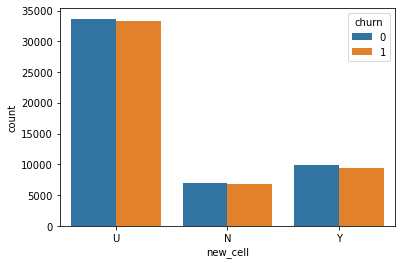

churn,0,1
new_cell,,
N,0.503373,0.496627
U,0.503049,0.496951
Y,0.509715,0.490285


In [13]:
# new_cell vs churn
sns.countplot(x= "new_cell", hue="churn", data=df);
plt.xticks()
plt.show()
df.groupby('new_cell')["churn"].value_counts(normalize=True).unstack(fill_value=0)

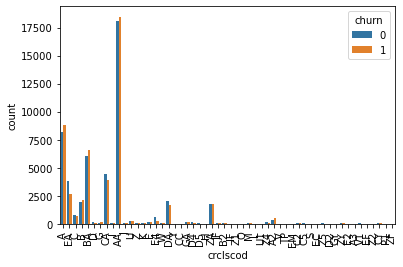

churn,0,1
crclscod,,
A,0.482702,0.517298
A2,0.384437,0.615563
A3,0.333333,0.666667
AA,0.494316,0.505684
B,0.475669,0.524331
B2,0.467890,0.532110
BA,0.478724,0.521276
C,0.520604,0.479396
C2,0.527778,0.472222


In [14]:
# crclscod vs churn
sns.countplot(x= "crclscod", hue="churn", data=df);
plt.xticks(rotation = 90)
plt.show()
df.groupby('crclscod')["churn"].value_counts(normalize=True).unstack(fill_value=0)

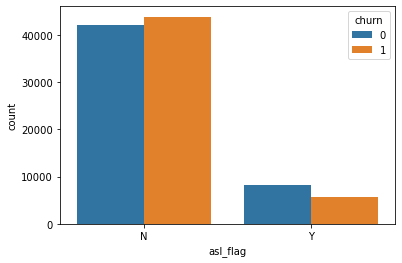

churn,0,1
asl_flag,,
N,0.490402,0.509598
Y,0.590700,0.409300


In [15]:
# asl_flag vs churn
sns.countplot(x= "asl_flag", hue="churn", data=df);
plt.xticks()
plt.show()
df.groupby('asl_flag')["churn"].value_counts(normalize=True).unstack(fill_value=0)

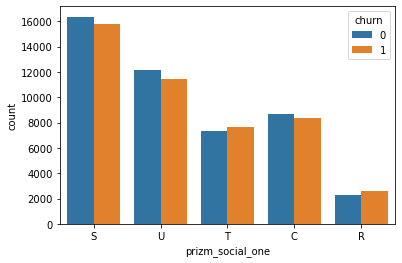

churn,0,1
prizm_social_one,,
C,0.509226,0.490774
R,0.472932,0.527068
S,0.509238,0.490762
T,0.491627,0.508373
U,0.515182,0.484818


In [16]:
# prizm_social_one vs churn
sns.countplot(x= "prizm_social_one", hue="churn", data=df);
plt.xticks()
plt.show()
df.groupby('prizm_social_one')["churn"].value_counts(normalize=True).unstack(fill_value=0)

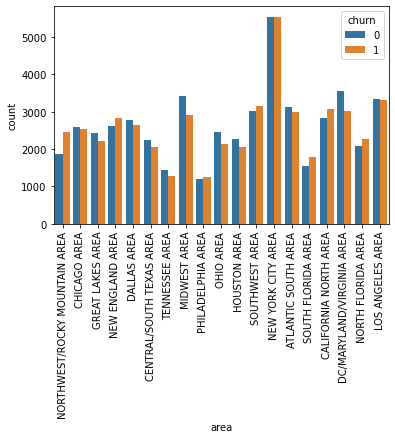

churn,0,1
area,,
ATLANTIC SOUTH AREA,0.510274,0.489726
CALIFORNIA NORTH AREA,0.478945,0.521055
CENTRAL/SOUTH TEXAS AREA,0.521517,0.478483
CHICAGO AREA,0.504766,0.495234
DALLAS AREA,0.512532,0.487468
DC/MARYLAND/VIRGINIA AREA,0.539668,0.460332
GREAT LAKES AREA,0.523553,0.476447
HOUSTON AREA,0.524994,0.475006
LOS ANGELES AREA,0.501808,0.498192


In [17]:
# area vs churn
sns.countplot(x= "area", hue="churn", data=df);
plt.xticks(rotation = 90)
plt.show()
df.groupby('area')["churn"].value_counts(normalize=True).unstack(fill_value=0)

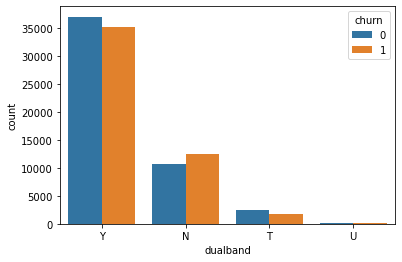

churn,0,1
dualband,,
N,0.463183,0.536817
T,0.578082,0.421918
U,0.653153,0.346847
Y,0.512738,0.487262


In [18]:
# dualband vs churn
sns.countplot(x= "dualband", hue="churn", data=df);
plt.xticks()
plt.show()
df.groupby('dualband')["churn"].value_counts(normalize=True).unstack(fill_value=0)

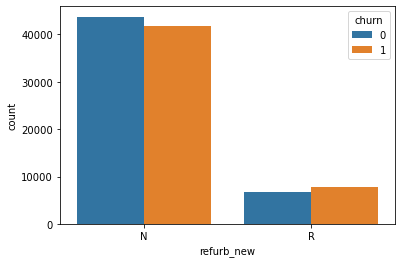

churn,0,1
refurb_new,,
N,0.510895,0.489105
R,0.465639,0.534361


In [19]:
# refurb_new vs churn
sns.countplot(x= "refurb_new", hue="churn", data=df);
plt.xticks()
plt.show()

df.groupby('refurb_new')["churn"].value_counts(normalize=True).unstack(fill_value=0)

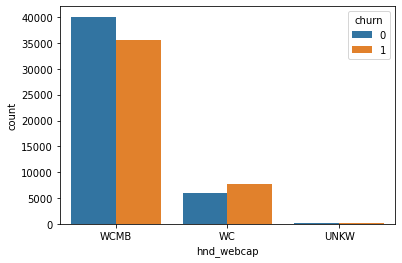

churn,0,1
hnd_webcap,,
UNKW,0.634043,0.365957
WC,0.436972,0.563028
WCMB,0.529201,0.470799


In [20]:
# hnd_webcap vs churn
sns.countplot(x= "hnd_webcap", hue="churn", data=df);
plt.xticks()
plt.show()
df.groupby('hnd_webcap')["churn"].value_counts(normalize=True).unstack(fill_value=0)

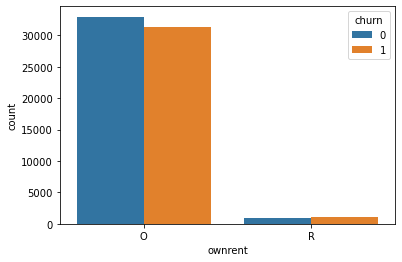

churn,0,1
ownrent,,
O,0.512803,0.487197
R,0.480597,0.519403


In [21]:
sns.countplot(x= "ownrent", hue="churn", data=df);
plt.xticks()
plt.show()
df.groupby('ownrent')["churn"].value_counts(normalize=True).unstack(fill_value=0)

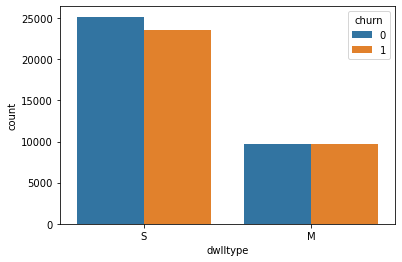

churn,0,1
dwlltype,,
M,0.501345,0.498655
S,0.516069,0.483931


In [22]:
sns.countplot(x= "dwlltype", hue="churn", data=df);
plt.xticks()
plt.show()
df.groupby('dwlltype')["churn"].value_counts(normalize=True).unstack(fill_value=0)

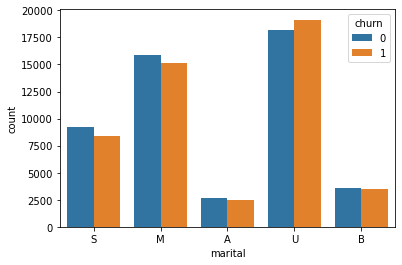

churn,0,1
marital,,
A,0.510311,0.489689
B,0.503092,0.496908
M,0.511336,0.488664
S,0.525330,0.474670
U,0.487344,0.512656


In [23]:
sns.countplot(x= "marital", hue="churn", data=df);
plt.xticks()
plt.show()
df.groupby('marital')["churn"].value_counts(normalize=True).unstack(fill_value=0)

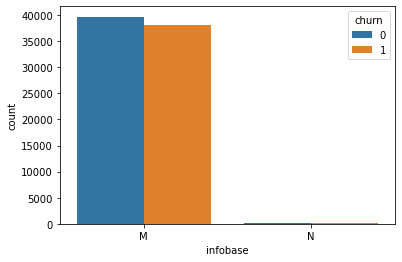

churn,0,1
infobase,,
M,0.510779,0.489221
N,0.669643,0.330357


In [24]:
sns.countplot(x= "infobase", hue="churn", data=df);
plt.xticks()
plt.show()
df.groupby('infobase')["churn"].value_counts(normalize=True).unstack(fill_value=0)

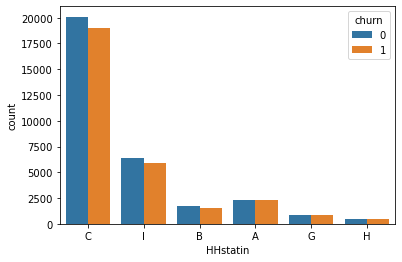

churn,0,1
HHstatin,,
A,0.500857,0.499143
B,0.520333,0.479667
C,0.513623,0.486377
G,0.497169,0.502831
H,0.477790,0.522210
I,0.519025,0.480975


In [25]:
sns.countplot(x= "HHstatin", hue="churn", data=df);
plt.xticks()
plt.show()
df.groupby('HHstatin')["churn"].value_counts(normalize=True).unstack(fill_value=0)

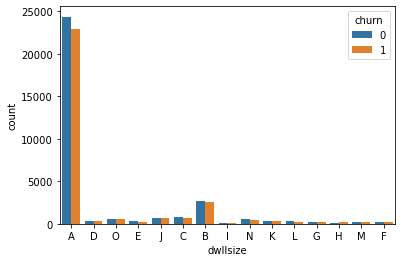

churn,0,1
dwllsize,,
A,0.515772,0.484228
B,0.504323,0.495677
C,0.524382,0.475618
D,0.491299,0.508701
E,0.539595,0.460405
F,0.507317,0.492683
G,0.515068,0.484932
H,0.480132,0.519868
I,0.466418,0.533582


In [26]:
sns.countplot(x= "dwllsize", hue="churn", data=df);
plt.xticks()
plt.show()
df.groupby('dwllsize')["churn"].value_counts(normalize=True).unstack(fill_value=0)

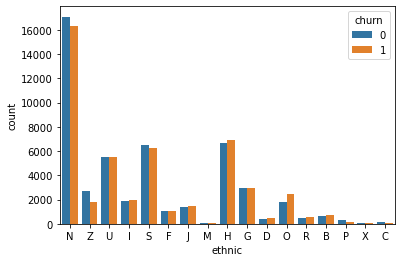

churn,0,1
ethnic,,
B,0.446870,0.553130
C,0.684426,0.315574
D,0.466513,0.533487
F,0.496474,0.503526
G,0.504227,0.495773
H,0.491669,0.508331
I,0.487798,0.512202
J,0.483791,0.516209
M,0.463087,0.536913


In [27]:
sns.countplot(x= "ethnic", hue="churn", data=df);
plt.xticks()
plt.show()
df.groupby('ethnic')["churn"].value_counts(normalize=True).unstack(fill_value=0)

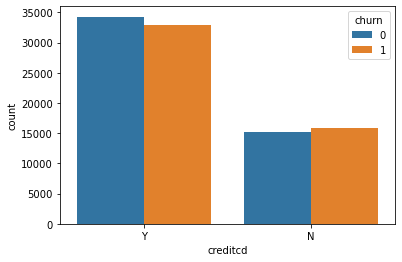

churn,0,1
creditcd,,
N,0.491719,0.508281
Y,0.509787,0.490213


In [28]:
# creditcd vs churn
sns.countplot(x= "creditcd", hue="churn", data=df);
plt.xticks()
plt.show()
df.groupby('creditcd')["churn"].value_counts(normalize=True).unstack(fill_value=0)

<a id = "5"></a><br>
## Numerical Variable

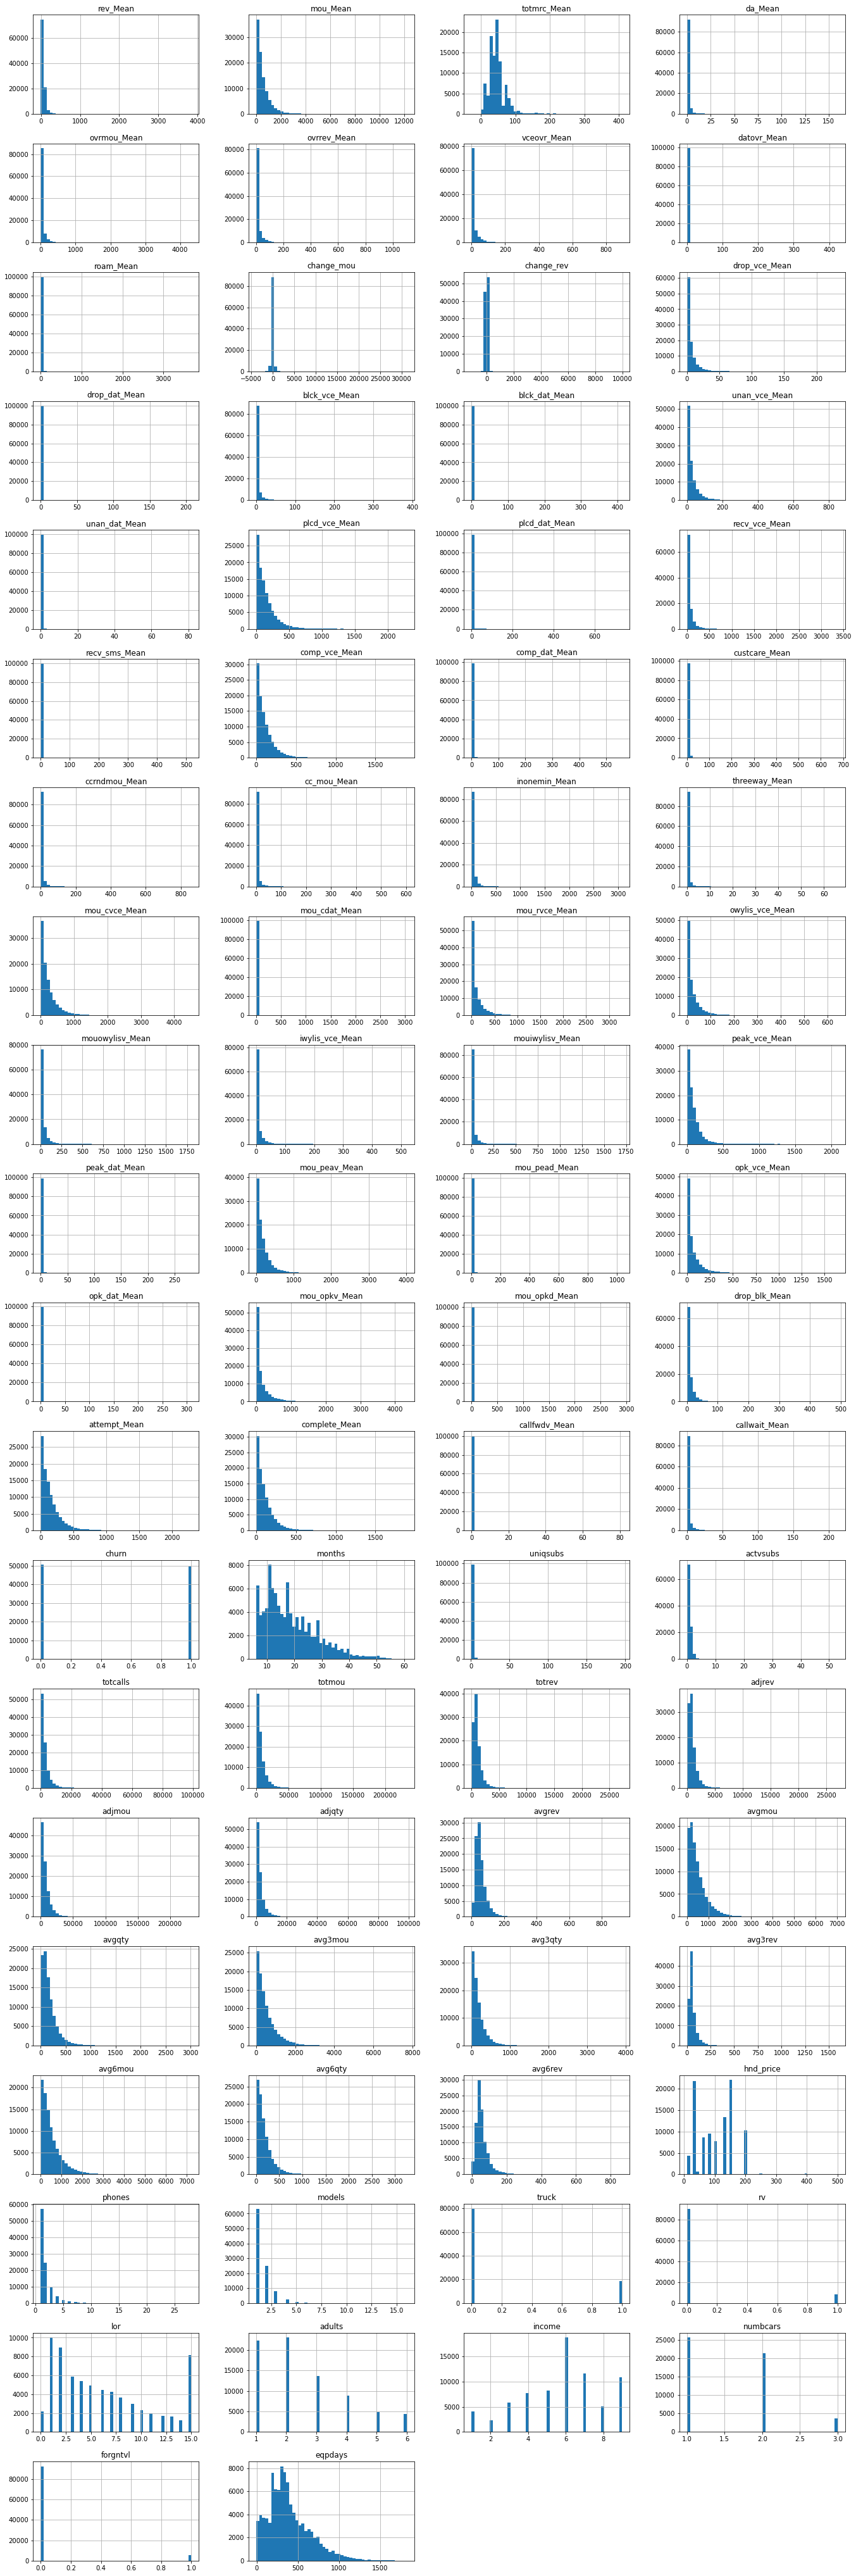

In [29]:
df.iloc[:,:].hist(bins=50,figsize=(23,74),layout=(20,4));

<a id = "6"></a><br>
# 3 | Basic Data Analysis

In [30]:
stay = df[(df['churn'] ==0) ].count()[1]
churn = df[(df['churn'] ==1) ].count()[1]
print ("num of pepole who stay: "+ str(stay))
print ("num of pepole who churn: "+ str(churn))

num of pepole who stay: 50326
num of pepole who churn: 49317


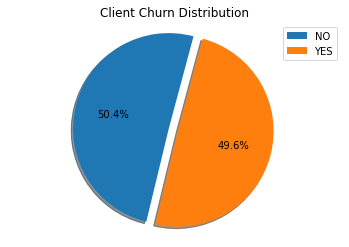

In [31]:
# ratio of those who churn and those who don't
sizes = [48401,47647]
labels='NO','YES'
explode = (0, 0.1)  
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode,autopct='%1.1f%%',shadow=True, startangle=75 )
ax1.axis('equal') 
ax1.set_title("Client Churn Distribution")

ax1.legend(labels)

plt.show()

<a id = "7"></a><br>
# 4 | Missing Value
- Find Missing Value
- Fill Missing Value

<a id = "8"></a><br>
## Find Missing Value

In [32]:
df.columns[df.isnull().any()]

Index(['rev_Mean', 'mou_Mean', 'totmrc_Mean', 'da_Mean', 'ovrmou_Mean',
       'ovrrev_Mean', 'vceovr_Mean', 'datovr_Mean', 'roam_Mean', 'change_mou',
       'change_rev', 'avg6mou', 'avg6qty', 'avg6rev', 'prizm_social_one',
       'area', 'dualband', 'refurb_new', 'hnd_price', 'phones', 'models',
       'hnd_webcap', 'truck', 'rv', 'ownrent', 'lor', 'dwlltype', 'marital',
       'adults', 'infobase', 'income', 'numbcars', 'HHstatin', 'dwllsize',
       'forgntvl', 'ethnic', 'kid0_2', 'kid3_5', 'kid6_10', 'kid11_15',
       'kid16_17', 'creditcd', 'eqpdays'],
      dtype='object')

In [33]:
# Features with missing values
miss = df.isnull().sum().sort_values(ascending = False).head(44)
miss_per = (miss/len(df))*100

# Percentage of missing values
pd.DataFrame({'No. missing values': miss, '% of missing data': miss_per.values})

,No. missing values,% of missing data
numbcars,49366,49.366
dwllsize,38308,38.308
HHstatin,37923,37.923
ownrent,33706,33.706
dwlltype,31909,31.909
lor,30190,30.190
income,25436,25.436
adults,23019,23.019
infobase,22079,22.079
hnd_webcap,10189,10.189


<a id = "9"></a><br>
## Fill Missing Value

In [34]:
# We dropped the columns that seem to have no significant contribution to the model.
df.drop(['numbcars','dwllsize','HHstatin','ownrent','dwlltype','lor','income','adults','prizm_social_one','infobase','crclscod'],axis=1,inplace=True)

In [35]:
import numpy as np

df['hnd_webcap']=df['hnd_webcap'].fillna('UNKW') # Handset web capability

df['avg6qty']=df['avg6qty'].fillna(np.random.normal(loc=df['avg6qty'].mean(), scale = df['avg6qty'].std() )) # Billing adjusted total number of calls over the life of the customer
df['avg6rev']=df['avg6rev'].fillna(np.random.normal(loc=df['avg6rev'].mean(), scale = df['avg6rev'].std() )) # Average monthly revenue over the life of the customer
df['avg6mou']=df['avg6mou'].fillna(np.random.normal(loc=df['avg6mou'].mean(), scale = df['avg6mou'].std() ))# Average monthly minutes of use over the life of the customer

df['change_mou']=df['change_mou'].fillna(np.random.normal(loc=df['change_mou'].mean(), scale = df['change_mou'].std() )) # Percentage change in monthly minutes of use vs previous three month average
df['change_rev']=df['change_rev'].fillna(np.random.normal(loc=df['change_rev'].mean(), scale = df['change_rev'].std() )) # Percentage change in monthly revenue vs previous three month average

df['rev_Mean']=df['rev_Mean'].fillna(np.random.normal(loc=df['rev_Mean'].mean(), scale = df['rev_Mean'].std() ))
df['totmrc_Mean']=df['totmrc_Mean'].fillna(np.random.normal(loc=df['totmrc_Mean'].mean(), scale = df['totmrc_Mean'].std() ))
df['da_Mean']=df['da_Mean'].fillna(np.random.normal(loc=df['da_Mean'].mean(), scale = df['da_Mean'].std() ))
df['ovrmou_Mean']=df['ovrmou_Mean'].fillna(np.random.normal(loc=df['ovrmou_Mean'].mean(), scale = df['ovrmou_Mean'].std() ))
df['ovrrev_Mean']=df['ovrrev_Mean'].fillna(np.random.normal(loc=df['ovrrev_Mean'].mean(), scale = df['ovrrev_Mean'].std() ))
df['vceovr_Mean']=df['vceovr_Mean'].fillna(np.random.normal(loc=df['vceovr_Mean'].mean(), scale = df['vceovr_Mean'].std() ))
df['datovr_Mean']=df['datovr_Mean'].fillna(np.random.normal(loc=df['datovr_Mean'].mean(), scale = df['datovr_Mean'].std() ))
df['roam_Mean']=df['roam_Mean'].fillna(np.random.normal(loc=df['roam_Mean'].mean(), scale = df['roam_Mean'].std() ))
df['mou_Mean']=df['mou_Mean'].fillna(np.random.normal(loc=df['mou_Mean'].mean(), scale = df['mou_Mean'].std() ))


In [36]:
#VISUALIZATION OF NAN  VALUES
#import missingno as msno
#pip install missingno
#%matplotlib inline
#msno.matrix(df);

In [37]:
miss = df.isnull().sum().sort_values(ascending = False).head(44)
miss_per = (miss/len(df))*100

# Percentage of missing values
pd.DataFrame({'No. missing values': miss, '% of missing data': miss_per.values})

,No. missing values,% of missing data
creditcd,1732,1.732
kid16_17,1732,1.732
kid11_15,1732,1.732
kid6_10,1732,1.732
kid3_5,1732,1.732
kid0_2,1732,1.732
ethnic,1732,1.732
forgntvl,1732,1.732
marital,1732,1.732
rv,1732,1.732


In [38]:
df.dropna(inplace=True)

In [39]:
sum(df.isnull().sum()>0)

0

In [40]:
columns_categories(df)

object( 14 ):
 ['new_cell', 'asl_flag', 'area', 'dualband', 'refurb_new', 'hnd_webcap', 'marital', 'ethnic', 'kid0_2', 'kid3_5', 'kid6_10', 'kid11_15', 'kid16_17', 'creditcd']
int( 0 ):
 []
float( 65 ):
 ['rev_Mean', 'mou_Mean', 'totmrc_Mean', 'da_Mean', 'ovrmou_Mean', 'ovrrev_Mean', 'vceovr_Mean', 'datovr_Mean', 'roam_Mean', 'change_mou', 'change_rev', 'drop_vce_Mean', 'drop_dat_Mean', 'blck_vce_Mean', 'blck_dat_Mean', 'unan_vce_Mean', 'unan_dat_Mean', 'plcd_vce_Mean', 'plcd_dat_Mean', 'recv_vce_Mean', 'recv_sms_Mean', 'comp_vce_Mean', 'comp_dat_Mean', 'custcare_Mean', 'ccrndmou_Mean', 'cc_mou_Mean', 'inonemin_Mean', 'threeway_Mean', 'mou_cvce_Mean', 'mou_cdat_Mean', 'mou_rvce_Mean', 'owylis_vce_Mean', 'mouowylisv_Mean', 'iwylis_vce_Mean', 'mouiwylisv_Mean', 'peak_vce_Mean', 'peak_dat_Mean', 'mou_peav_Mean', 'mou_pead_Mean', 'opk_vce_Mean', 'opk_dat_Mean', 'mou_opkv_Mean', 'mou_opkd_Mean', 'drop_blk_Mean', 'attempt_Mean', 'complete_Mean', 'callfwdv_Mean', 'callwait_Mean', 'totmou', 't

In [41]:
numerical_features = ['months', 'uniqsubs', 'actvsubs', 'totcalls', 'avg3qty', 'avg3rev','rev_Mean', 'mou_Mean', 'totmrc_Mean', 'da_Mean', 'ovrmou_Mean', 'datovr_Mean', 
                      'roam_Mean', 'change_mou', 'change_rev', 'drop_vce_Mean', 'drop_dat_Mean', 'blck_vce_Mean', 'blck_dat_Mean', 'unan_vce_Mean', 'unan_dat_Mean', 
                      'plcd_vce_Mean', 'plcd_dat_Mean', 'recv_vce_Mean', 'recv_sms_Mean', 'custcare_Mean', 'ccrndmou_Mean', 'threeway_Mean', 'mou_cvce_Mean', 
                      'mou_cdat_Mean', 'mou_rvce_Mean', 'owylis_vce_Mean', 'mouowylisv_Mean', 'iwylis_vce_Mean', 'mouiwylisv_Mean', 'peak_vce_Mean', 'peak_dat_Mean', 
                      'mou_peav_Mean', 'mou_pead_Mean', 'opk_vce_Mean', 'opk_dat_Mean', 'mou_opkv_Mean', 'drop_blk_Mean', 'callfwdv_Mean', 'callwait_Mean', 'totmou', 
                      'totrev', 'avgrev', 'avgmou', 'avgqty', 'avg6mou', 'avg6rev', 'hnd_price', 'phones', 'models', 'truck', 'rv', 'forgntvl', 'eqpdays']

In [42]:
for i in numerical_features:    
    f_sqrt= (lambda x: np.sqrt(abs(x)) if (x>=1) or (x<=-1) else x)
    df[i] = df[i].apply(f_sqrt)

<a id = "10"></a><br>
# 5 | Visualization

<a id = "11"></a><br>
# Box plot of numerical features

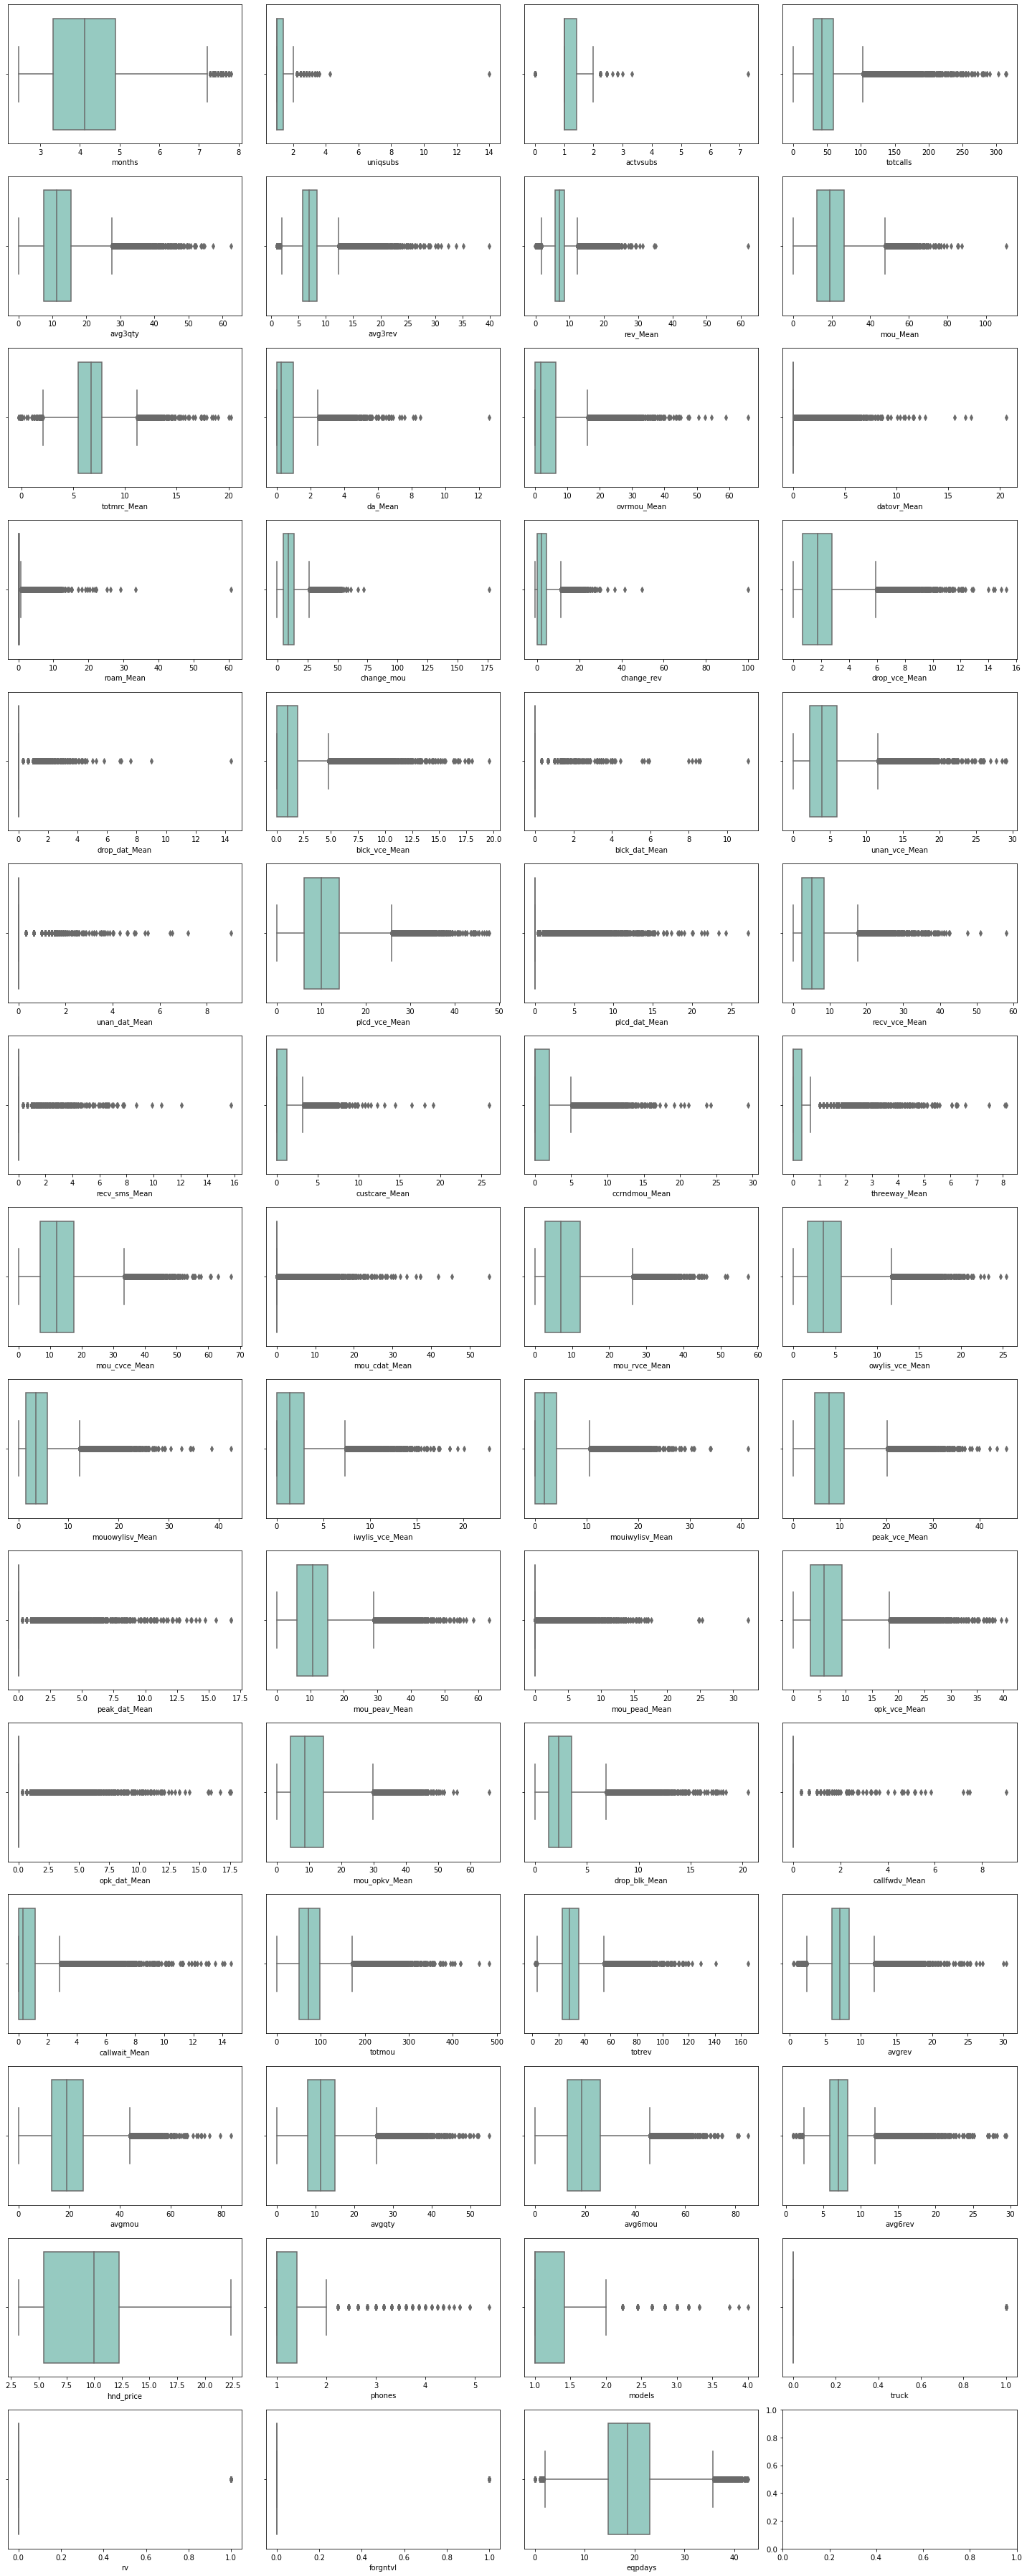

In [43]:
# Box plot of numerical features
fig, ax = plt.subplots(15, 4, figsize = (20, 50))
ax = ax.flatten()
for i, c in enumerate(numerical_features):
    sns.boxplot(x = df[c], ax = ax[i], palette = 'Set3')
# plt.suptitle('Box Plot', fontsize = 25)
fig.tight_layout()

- columns without outliers : 
- 'months', 'uniqsubs', 'actvsubs', 'totcalls', 'avg3qty', 'avg3rev','rev_Mean', 'mou_Mean', 'totmrc_Mean', 'da_Mean', 'ovrmou_Mean', 'datovr_Mean', 
   'roam_Mean', 'change_mou', 'change_rev', 'drop_vce_Mean', 'drop_dat_Mean', 'blck_vce_Mean', 'blck_dat_Mean', 'unan_vce_Mean', 'unan_dat_Mean', 
   'plcd_vce_Mean', 'plcd_dat_Mean', 'recv_vce_Mean', 'recv_sms_Mean', 'custcare_Mean', 'ccrndmou_Mean', 'threeway_Mean', 'mou_cvce_Mean', 
   'mou_cdat_Mean', 'mou_rvce_Mean', 'owylis_vce_Mean', 'mouowylisv_Mean', 'iwylis_vce_Mean', 'mouiwylisv_Mean', 'peak_vce_Mean', 'peak_dat_Mean', 
   'mou_peav_Mean', 'mou_pead_Mean', 'opk_vce_Mean', 'opk_dat_Mean', 'mou_opkv_Mean', 'drop_blk_Mean', 'callfwdv_Mean', 'callwait_Mean', 'totmou', 
   'totrev', 'avgrev', 'avgmou', 'avgqty', 'avg6mou', 'avg6rev', 'hnd_price', 'phones', 'models', 'truck', 'rv', 'forgntvl', 'eqpdays'

<a id = "12"></a><br>
# 6 | Outlier Detection

In [44]:
def detect_outliers(df,features):
    outlier_indices = []
    
    for c in features:
        # 1st quartile
        Q1 = np.percentile(df[c],25)
        # 3rd quartile
        Q3 = np.percentile(df[c],75)
        # IQR
        IQR = Q3 - Q1
        # Outlier step
        outlier_step = IQR * 1.5
        # detect outlier and their indeces
        outlier_list_col = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index
        # store indeces
        outlier_indices.extend(outlier_list_col)
    
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 2)
    
    return outlier_indices

In [45]:
df.loc[detect_outliers(df,['uniqsubs', 'actvsubs'])]

,rev_Mean,mou_Mean,totmrc_Mean,da_Mean,ovrmou_Mean,ovrrev_Mean,vceovr_Mean,datovr_Mean,roam_Mean,change_mou,...,marital,forgntvl,ethnic,kid0_2,kid3_5,kid6_10,kid11_15,kid16_17,creditcd,eqpdays
14,14.577894,44.401577,9.219002,1.492481,15.795569,99.8000,99.800,0.000000,5.957978,14.159802,...,S,0.0,N,U,U,Y,U,U,Y,14.106736
28,9.920811,24.657656,9.746281,1.112430,6.442049,12.1950,7.125,2.251666,0.000000,23.727621,...,B,0.0,G,U,U,U,U,U,Y,13.527749
47,8.848022,29.180473,9.219544,0.000000,0.000000,0.0000,0.000,0.000000,0.000000,14.335271,...,M,0.0,H,U,U,U,U,U,Y,12.288206
76,5.103430,36.701499,3.162278,2.333452,8.602325,11.1000,11.100,0.000000,0.000000,32.863353,...,U,0.0,N,U,U,U,U,U,Y,17.578396
101,10.683281,40.617115,9.110434,1.316245,7.176350,14.6475,1.875,3.573863,0.000000,13.294736,...,S,0.0,U,U,U,U,U,U,Y,17.492856
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95533,8.722815,37.178623,9.082401,0.742500,0.250000,0.0975,0.000,0.097500,0.257500,12.796484,...,U,0.0,X,U,U,U,U,U,N,10.488088
95574,13.001154,28.447320,8.743140,2.279803,16.132266,104.1000,104.100,0.000000,0.790000,9.500000,...,B,0.0,P,U,U,U,U,U,N,13.527749
95640,9.433716,26.153394,7.437237,1.112430,8.746428,30.5550,28.800,1.324764,0.390000,8.544004,...,U,0.0,P,U,U,U,U,U,N,13.453624
95658,11.498369,30.475400,6.124949,0.000000,10.344080,42.8000,42.800,0.000000,0.000000,35.947879,...,S,0.0,P,U,U,U,U,U,N,13.453624


In [46]:
# drop outliers
df = df.drop(detect_outliers(df,['uniqsubs', 'actvsubs']),axis = 0).reset_index(drop = True)

<a id = "13"></a><br>
# 7 | Feature Engineering

<a id = "14"></a><br>
# One-hot encoding
- Before looking at the correlation, let's make the categorical variables numerical with get_dummies.

In [47]:
# Unique variables of object columns
encoding_col=[]
for i in df.select_dtypes(include='object'):   
    print(i,'-->',df[i].nunique())
    encoding_col.append(i)

new_cell --> 3
asl_flag --> 2
area --> 19
dualband --> 3
refurb_new --> 2
hnd_webcap --> 3
marital --> 5
ethnic --> 17
kid0_2 --> 2
kid3_5 --> 2
kid6_10 --> 2
kid11_15 --> 2
kid16_17 --> 2
creditcd --> 2


In [48]:
# one-hot encoding for variables with more than 2 categories
df2 = df.copy()
df2 = pd.get_dummies(df2, drop_first=True, columns = encoding_col, prefix = encoding_col)

In [49]:
display(df.shape)
display(df2.shape)

(96048, 88)

(96048, 126)

In [50]:
# Create correlation matrix
corr_matrix = df.corr().abs()
# print(corr_matrix)

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
# Drop features 
df.drop(df[to_drop], axis=1,inplace=True)

<a id = "15"></a><br>
# Ascending ranking of correlations between feaures and churn

In [51]:
c = df.corr()['churn'].abs()
sc = c.sort_values()
print(sc.tail(60))


drop_dat_Mean      0.007523
mou_opkd_Mean      0.007723
blck_dat_Mean      0.009244
comp_dat_Mean      0.009386
unan_dat_Mean      0.011286
totrev             0.013963
mou_pead_Mean      0.015319
peak_dat_Mean      0.015761
adjqty             0.016098
opk_dat_Mean       0.016644
roam_Mean          0.016928
avgqty             0.017121
adjmou             0.017291
mou_cdat_Mean      0.017810
da_Mean            0.019488
rev_Mean           0.019836
plcd_dat_Mean      0.019927
avgmou             0.020541
ovrrev_Mean        0.020703
blck_vce_Mean      0.021105
actvsubs           0.021128
avg6rev            0.021360
drop_vce_Mean      0.022338
change_mou         0.024224
ovrmou_Mean        0.028003
drop_blk_Mean      0.028973
change_rev         0.030376
inonemin_Mean      0.035106
months             0.035157
cc_mou_Mean        0.035698
avg6qty            0.036132
threeway_Mean      0.039922
phones             0.041088
callwait_Mean      0.041333
avg6mou            0.044981
models             0

In [52]:
a = dict(sc.tail(70))
b = a.keys()
print(sorted(b))

['actvsubs', 'adjmou', 'adjqty', 'avg3mou', 'avg3qty', 'avg6mou', 'avg6qty', 'avg6rev', 'avgmou', 'avgqty', 'avgrev', 'blck_dat_Mean', 'blck_vce_Mean', 'callfwdv_Mean', 'callwait_Mean', 'cc_mou_Mean', 'ccrndmou_Mean', 'change_mou', 'change_rev', 'churn', 'comp_dat_Mean', 'comp_vce_Mean', 'custcare_Mean', 'da_Mean', 'datovr_Mean', 'drop_blk_Mean', 'drop_dat_Mean', 'drop_vce_Mean', 'eqpdays', 'forgntvl', 'hnd_price', 'inonemin_Mean', 'iwylis_vce_Mean', 'models', 'months', 'mou_Mean', 'mou_cdat_Mean', 'mou_cvce_Mean', 'mou_opkd_Mean', 'mou_opkv_Mean', 'mou_pead_Mean', 'mou_peav_Mean', 'mou_rvce_Mean', 'mouiwylisv_Mean', 'mouowylisv_Mean', 'opk_dat_Mean', 'opk_vce_Mean', 'ovrmou_Mean', 'ovrrev_Mean', 'owylis_vce_Mean', 'peak_dat_Mean', 'peak_vce_Mean', 'phones', 'plcd_dat_Mean', 'plcd_vce_Mean', 'recv_sms_Mean', 'recv_vce_Mean', 'rev_Mean', 'roam_Mean', 'rv', 'threeway_Mean', 'totcalls', 'totmou', 'totmrc_Mean', 'totrev', 'truck', 'unan_dat_Mean', 'unan_vce_Mean', 'uniqsubs']


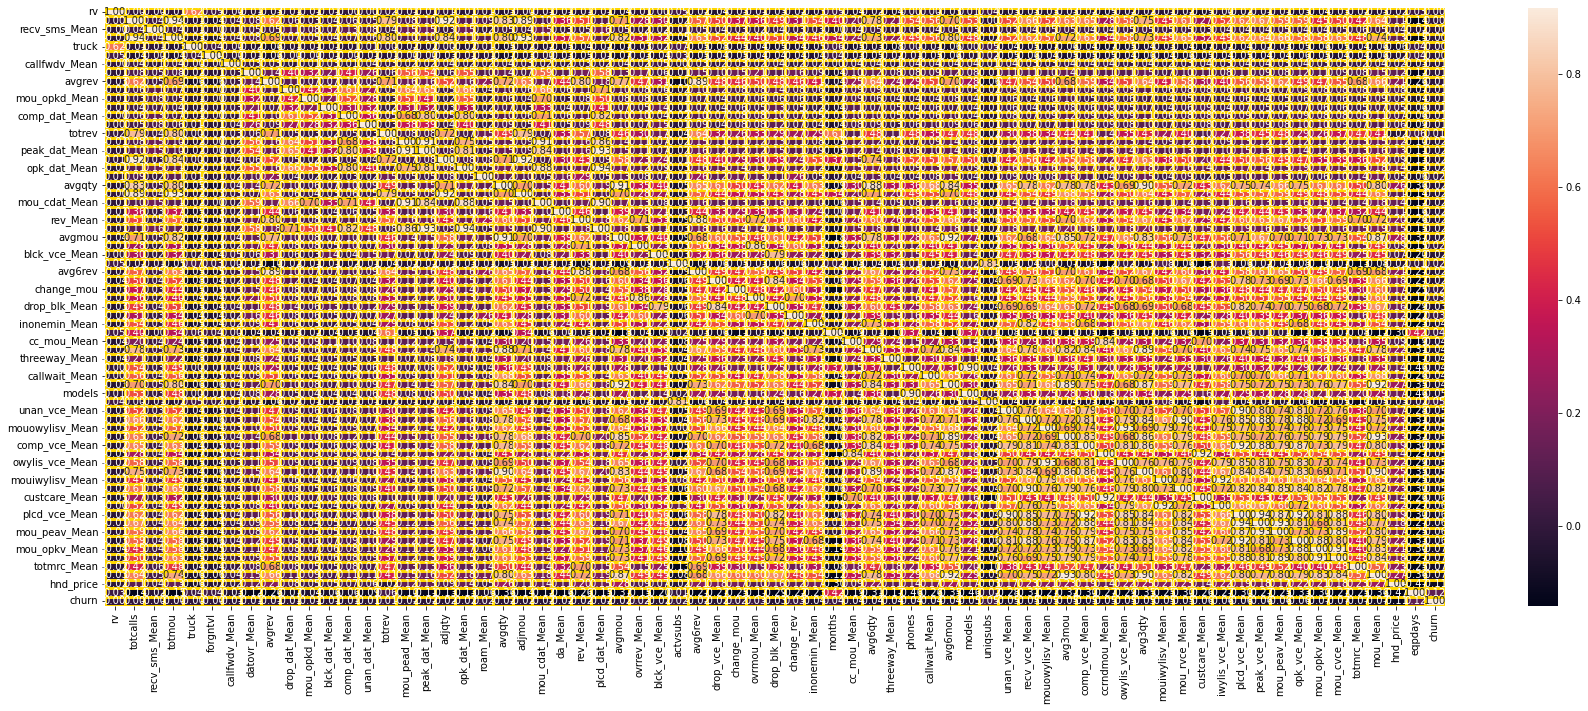

In [53]:
plt.figure(figsize=(30,11))
sns.heatmap(df2[b].corr(), annot = True, fmt = ".2f",robust=True,linewidths=1.3,linecolor = 'gold')
plt.show()

<AxesSubplot:>

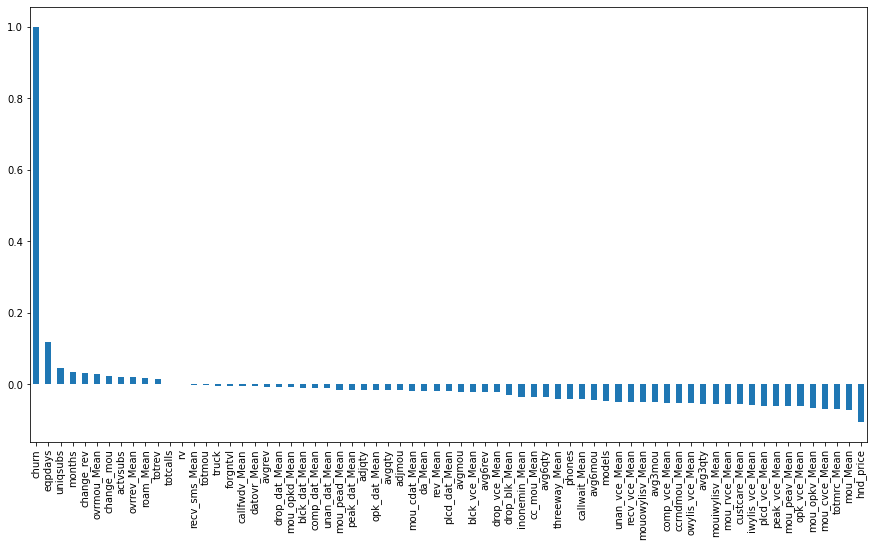

In [54]:
# Get Correlation of "churn" with other variables:
plt.figure(figsize=(15,8))
df2[b].corr()['churn'].sort_values(ascending = False).plot(kind='bar')

<a id = "16"></a><br>
# 8 | Modelling

<a id = "17"></a><br>
# Train - Test Split

In [55]:
# Import Machine learning algorithms
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
#Import metric for performance evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report,confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import RepeatedStratifiedKFold
#Split data into train and test sets
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler

In [56]:
# dependent and independent variables were determined.
X = df2.drop('churn', axis=1)
y = df2['churn']



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
print("X_train",len(X_train))
print("X_test",len(X_test))
print("y_train",len(y_train))
print("y_test",len(y_test))


mean = X_train.mean(axis=0)
std = X_test.std(axis=0)



X_train 57628
X_test 38420
y_train 57628
y_test 38420


In [57]:
X.shape


(96048, 125)

In [58]:
y.shape

(96048,)

In [59]:
stay = df[(df['churn'] ==0) ].count()[1]
churn = df[(df['churn'] ==1) ].count()[1]
print ("num of pepole who stay: "+ str(stay))
print ("num of pepole who churn: "+ str(churn))

num of pepole who stay: 48401
num of pepole who churn: 47647


In [60]:
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from imblearn.over_sampling import RandomOverSampler
from sklearn import linear_model

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [61]:
#Defining the modelling function
def modeling(alg, alg_name, params={}):
    model = alg(**params) #Instantiating the algorithm class and unpacking parameters if any
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3)
    steps = [('over', RandomOverSampler()), ('model', DecisionTreeClassifier())]
    pipeline = Pipeline(steps=steps)
    
    
    
    #Performance evaluation
    def print_scores(alg, y_true, y_pred):
        print(alg_name)
        acc_score = accuracy_score(y_true, y_pred)
        print("accuracy: ",acc_score)
        pre_score = precision_score(y_true, y_pred)
        print("precision: ",pre_score)
        rec_score = recall_score(y_true, y_pred)                            
        print("recall: ",rec_score)
        f_score = f1_score(y_true, y_pred, average='weighted')
        print("f1_score: ",f_score)        
    print_scores(alg, y_test, y_pred)

    
    
    cm = confusion_matrix(y_test, y_pred)
    #Create the Confusion Matrix Display Object(cmd_obj). 
    cmd_obj = ConfusionMatrixDisplay(cm, display_labels=['churn', 'notChurn'])

    #The plot() function has to be called for the sklearn visualization
    cmd_obj.plot()

    #Use the Axes attribute 'ax_' to get to the underlying Axes object.
    #The Axes object controls the labels for the X and the Y axes. It also controls the title.
    cmd_obj.ax_.set(
                    title='Sklearn Confusion Matrix with labels!!', 
                    xlabel='Predicted Churn', 
                    ylabel='Actual Churn')
    #Finally, call the matplotlib show() function to display the visualization of the Confusion Matrix.
    plt.show()
    
    return model


In [62]:
def draw_roc( y_true, y_pred ):
    fpr, tpr, thresholds = metrics.roc_curve(  y_true, y_pred,
                                              drop_intermediate = True )
    auc_score = metrics.roc_auc_score(  y_true, y_pred )
    print("ROC score: {}".format(auc_score))
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

Perceptron passes 1 0.5351900052056221
Perceptron passes 3 0.5330036439354503
Perceptron passes 5 0.5343310775637689
Perceptron passes 10 0.5414888079125455
Perceptron passes 20 0.5414888079125455
Perceptron passes 40 0.5414888079125455
Decision Tree 1 0.5839406559083811
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 2

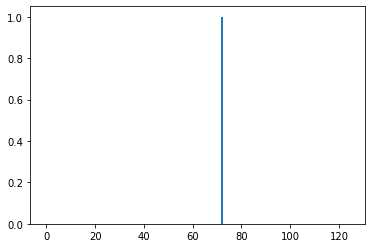

Decision Tree 3 0.5934669442998438
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.05939
Feature: 2, Score: 0.06332
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.0

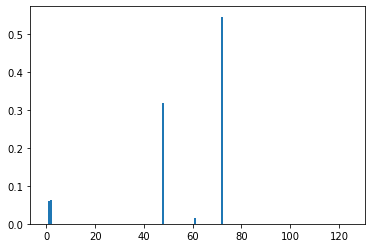

Decision Tree 5 0.5917751171264967
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.04315
Feature: 2, Score: 0.04971
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.06937
Feature: 10, Score: 0.01445
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00678
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00291
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.0

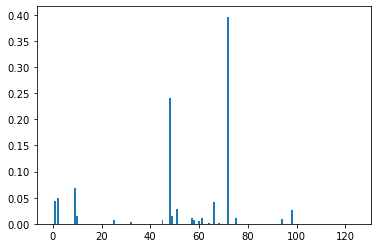

Random Forest
accuracy:  0.6121551275377407
precision:  0.6100907747519527
recall:  0.6060923819011168
f1_score:  0.6121420214496043


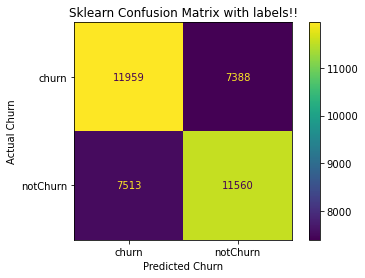

ROC score: 0.6121273512214982


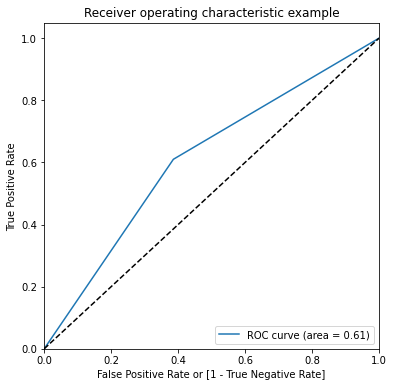

(array([0.        , 0.38583607, 1.        ]),
 array([0.        , 0.61009077, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [63]:
# Running RandomForestClassifier model
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import SGDRegressor

   
for passes in [1,3,5, 10, 20, 40]:
    model = Perceptron(max_iter = passes, random_state= 123)
    model.fit(X_train, y_train)
    print("Perceptron passes {} {}".format(passes, accuracy_score(y_test,model.predict(X_test))))
    
    
for depth in [1,3,5]:
    model = DecisionTreeClassifier(max_depth= depth, random_state = 123)
    model.fit(X_train, y_train)
    print("Decision Tree {} {}".format(depth, accuracy_score(y_test,model.predict(X_test))))
    # get importance
    importance = model.feature_importances_
    # summarize feature importance
    for i,v in enumerate(importance):
        print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
    plt.bar([x for x in range(len(importance))], importance)
    plt.show()

    
RF_model = modeling(RandomForestClassifier, 'Random Forest',)
draw_roc( RF_model.predict(X_test), y_test )

from itertools import product

import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

clf1 = DecisionTreeClassifier(max_depth=4)
clf2 = KNeighborsClassifier(n_neighbors=7)
clf3 = SVC(gamma=0.1, kernel="rbf", probability=True)
eclf = VotingClassifier(
    estimators=[("dt", clf1), ("knn", clf2), ("svc", clf3)],
    voting="soft",
    weights=[2, 1, 2],
)

clf1.fit(X, y)
clf2.fit(X, y)
clf3.fit(X, y)
eclf.fit(X, y)

# Plotting decision regions
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

f, axarr = plt.subplots(2, 2, sharex="col", sharey="row", figsize=(10, 8))

for idx, clf, tt in zip(
    product([0, 1], [0, 1]),
    [clf1, clf2, clf3, eclf],
    ["Decision Tree (depth=4)", "KNN (k=7)", "Kernel SVM", "Soft Voting"],
):

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
    axarr[idx[0], idx[1]].scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor="k")
    axarr[idx[0], idx[1]].set_title(tt)

plt.show()

Light GBM
accuracy:  0.6334200937011973
precision:  0.6251944792973652
recall:  0.6531222146489802
f1_score:  0.633297767448264


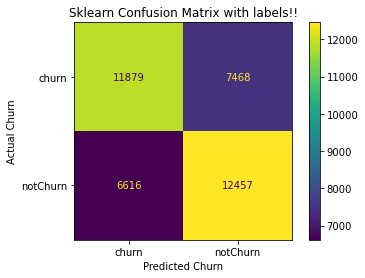

ROC score: 0.6337380885267577


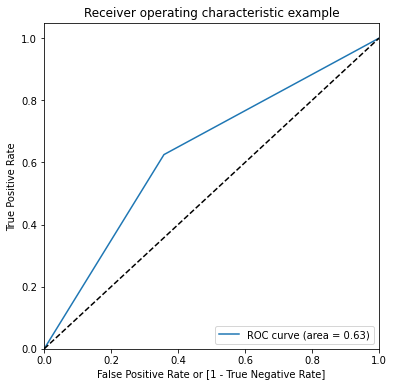

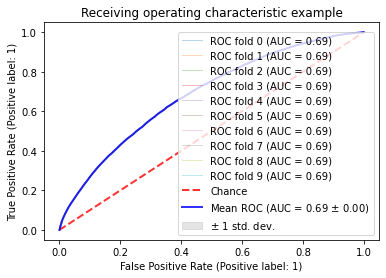

In [64]:
# LightGBM model
from sklearn.metrics import auc
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import StratifiedKFold



LGBM_model = modeling(lgb.LGBMClassifier, 'Light GBM')
draw_roc(LGBM_model.predict(X_test), y_test )

cv = StratifiedKFold(n_splits=10, shuffle = True, random_state =123) 
classifier = lgb.LGBMClassifier()
n_samples, n_features = X.shape

# Add noisy features
X = np.c_[X, np.random.randn(n_samples, 200 * n_features)]

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots()
for i, (train, test) in enumerate(cv.split(X, y)):
    classifier.fit(X_train, y_train)
    viz = RocCurveDisplay.from_estimator(
        classifier,
        X_test,
        y_test,
        name="ROC fold {}".format(i),
        alpha=0.3,
        lw=1,
        ax=ax,
    )
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

ax.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)

ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    title="Receiving operating characteristic example",
)
ax.legend(loc="lower right")
plt.show()

[Text(1395.0, 249.15, 'forgntvl <= -0.201\ngini = 0.5\nsamples = 57628\nvalue = [29054, 28574]\nclass = yes'),
 Text(697.5, 203.85000000000002, 'churn <= -0.916\ngini = 0.478\nsamples = 23050\nvalue = [13920, 9130]\nclass = yes'),
 Text(348.75, 158.55, 'totmrc_Mean <= -0.377\ngini = 0.437\nsamples = 9874\nvalue = [6691, 3183]\nclass = yes'),
 Text(174.375, 113.25, 'new_cell_Y <= 1.045\ngini = 0.497\nsamples = 1883\nvalue = [1016, 867]\nclass = yes'),
 Text(87.1875, 67.94999999999999, 'adjqty <= -1.186\ngini = 0.5\nsamples = 1402\nvalue = [694, 708]\nclass = no'),
 Text(43.59375, 22.649999999999977, 'gini = 0.486\nsamples = 697\nvalue = [406, 291]\nclass = yes'),
 Text(130.78125, 22.649999999999977, 'gini = 0.483\nsamples = 705\nvalue = [288, 417]\nclass = no'),
 Text(261.5625, 67.94999999999999, 'months <= 0.063\ngini = 0.443\nsamples = 481\nvalue = [322, 159]\nclass = yes'),
 Text(217.96875, 22.649999999999977, 'gini = 0.412\nsamples = 427\nvalue = [303, 124]\nclass = yes'),
 Text(305

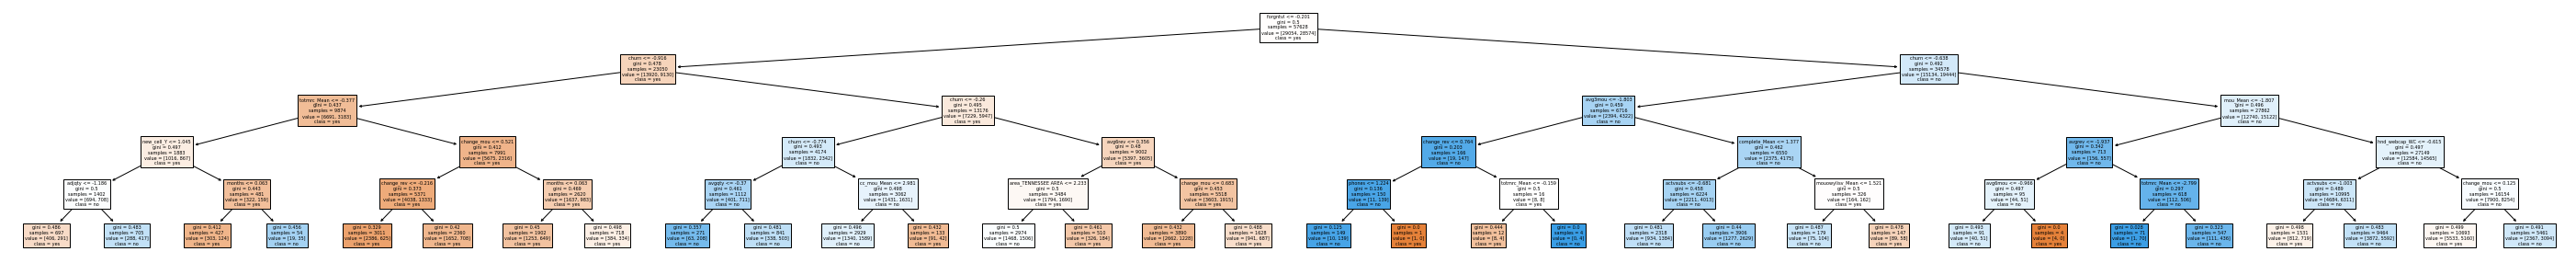

In [66]:
fn = df2.columns
plt.figure(figsize = (50,5))
plot_tree(model, feature_names = fn, class_names = ['yes','no'], filled = True)



In [67]:
pip install dtreeviz 

Note: you may need to restart the kernel to use updated packages.

In [68]:
import dtreeviz.trees

dt_viz = DecisionTreeClassifier(max_depth=3,random_state=43)
dt_viz.fit(X_train, y_train)
tree_viz1 = dtreeviz.trees.dtreeviz(dt_viz, X_train,y_train, target_name='churn', feature_names= df2.columns,class_names=['Churn','Not Churn'])

In [69]:
tree_viz1

ExecutableNotFound: failed to execute 'dot', make sure the Graphviz executables are on your systems' PATH

from sklearn.svm import SVC


from sklearn import linear_model

SVM = modeling(SVC, 'Light GBM')
draw_roc(SVM.predict(X_test), y_test )


cv = StratifiedKFold(n_splits=10, shuffle = True, random_state =123) 
classifier = SVC()

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots()
for i, (train, test) in enumerate(cv.split(X, y)):
    classifier.fit(X_train, y_train)
    viz = RocCurveDisplay.from_estimator(
        classifier,
        X_test,
        y_test,
        name="ROC fold {}".format(i),
        alpha=0.3,
        lw=1,
        ax=ax,
    )
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

ax.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)

ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    title="Receiving operating characteristic example",
)
ax.legend(loc="lower right")
plt.show()

In [70]:
#from sklearn.svm import OneClassSVM

#clf2 = OneClassSVM(gamma='auto').fit(X)
#clf2.predict(X)
#clf2.score_samples(X)



Decision Tree Classification
accuracy:  0.5518479958355024
precision:  0.5483047757929275
recall:  0.5519844806794946
f1_score:  0.5518536697099174


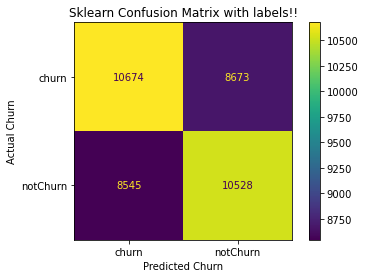

ROC score: 0.5518463365930661


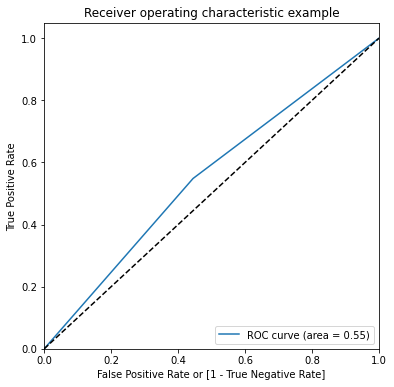

(array([0.       , 0.4446121, 1.       ]),
 array([0.        , 0.54830478, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [71]:
#Decision tree
dt_model = modeling(DecisionTreeClassifier, "Decision Tree Classification")
draw_roc(dt_model.predict(X_test), y_test )

Naive Bayes Classification
accuracy:  0.5350078084331078
precision:  0.5208606755543276
recall:  0.7906988937241126
f1_score:  0.5031100318807681


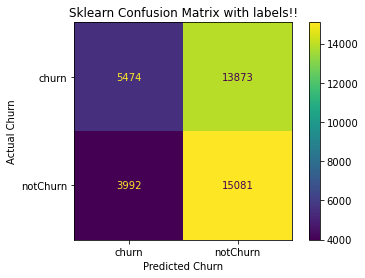

ROC score: 0.5495704180645079


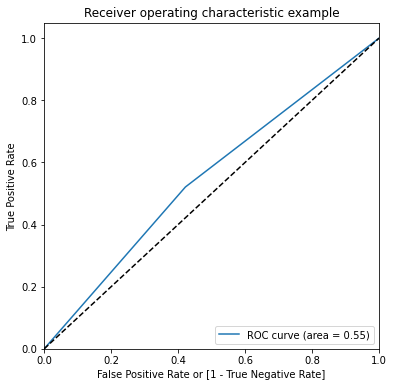

(array([0.        , 0.42171984, 1.        ]),
 array([0.        , 0.52086068, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [72]:
#Naive bayes 
nb_model = modeling(GaussianNB, "Naive Bayes Classification")
draw_roc(nb_model.predict(X_test), y_test )

Ada Boost Classifier
accuracy:  0.6171264966163457
precision:  0.6133658992880529
recall:  0.6188329051538825
f1_score:  0.6171310825316971


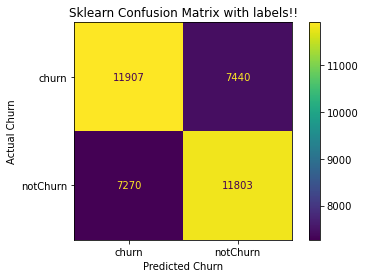

ROC score: 0.6171329678950563


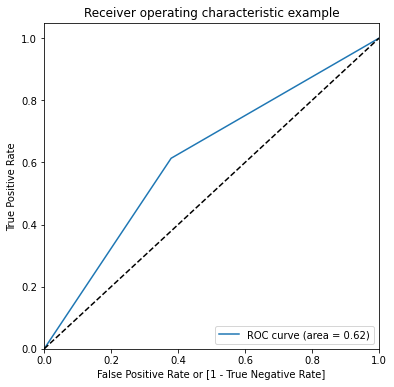

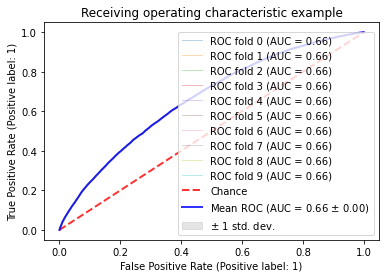

In [73]:
# Ada Boost
ada_model=modeling(AdaBoostClassifier, "Ada Boost Classifier")
draw_roc( ada_model.predict(X_test), y_test )

cv = StratifiedKFold(n_splits=10, shuffle = True) 
classifier = AdaBoostClassifier()

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots()
for i, (train, test) in enumerate(cv.split(X, y)):
    classifier.fit(X_train, y_train)
    viz = RocCurveDisplay.from_estimator(
        classifier,
        X_test,
        y_test,
        name="ROC fold {}".format(i),
        alpha=0.3,
        lw=1,
        ax=ax,
    )
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

ax.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)

ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    title="Receiving operating characteristic example",
)
ax.legend(loc="lower right")
plt.show()

In [74]:
#pip install xgboost


In [75]:
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn import model_selection
from sklearn.utils import class_weight
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.gaussian_process.kernels import RBF
import numpy as np
import pandas as pd

X = df2.drop('churn', axis=1)
y = df2['churn']

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

def run_exps(X_train: pd.DataFrame , y_train: pd.DataFrame, X_test: pd.DataFrame, y_test: pd.DataFrame) -> pd.DataFrame:
    '''
    Lightweight script to test many models and find winners
:param X_train: training split
    :param y_train: training target vector
    :param X_test: test split
    :param y_test: test target vector
    :return: DataFrame of predictions
    '''
kernel = 1.0 * RBF(1.0)
dfs = []
models = [
      ('LogReg', LogisticRegression()), 
      ('RF', RandomForestClassifier()),
      ('KNN', KNeighborsClassifier(3)), 
      ('MLP', MLPClassifier(alpha=1, max_iter=1000)),
      ('GNB', GaussianNB()),
      ('XGB', XGBClassifier())]
results = []
names = []
scoring = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted', 'roc_auc']
target_names = ['0', '1']
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, shuffle=True)
    cv_results = model_selection.cross_validate(model, X_train, y_train, cv=kfold, scoring=scoring)
    clf = model.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(name)
    print(classification_report(y_test, y_pred, target_names=target_names))
    results.append(cv_results)
    names.append(name)


    this_df = pd.DataFrame(cv_results)
    this_df['model'] = name
    dfs.append(this_df)


    final = pd.concat(dfs, ignore_index=True)

return final

LogReg
              precision    recall  f1-score   support

           0       0.61      0.62      0.62     19347
           1       0.61      0.59      0.60     19073

    accuracy                           0.61     38420
   macro avg       0.61      0.61      0.61     38420
weighted avg       0.61      0.61      0.61     38420

RF
              precision    recall  f1-score   support

           0       0.61      0.62      0.62     19347
           1       0.61      0.60      0.61     19073

    accuracy                           0.61     38420
   macro avg       0.61      0.61      0.61     38420
weighted avg       0.61      0.61      0.61     38420

KNN
              precision    recall  f1-score   support

           0       0.53      0.55      0.54     19347
           1       0.53      0.51      0.52     19073

    accuracy                           0.53     38420
   macro avg       0.53      0.53      0.53     38420
weighted avg       0.53      0.53      0.53     38420

MLP
 

SyntaxError: 'return' outside function (Temp/ipykernel_6368/782665903.py, line 64)

RF
              precision    recall  f1-score   support

           0       0.62      0.62      0.62     19347
           1       0.61      0.60      0.61     19073

    accuracy                           0.61     38420
   macro avg       0.61      0.61      0.61     38420
weighted avg       0.61      0.61      0.61     38420

Feature: 0, Score: 0.01954
Feature: 1, Score: 0.02214
Feature: 2, Score: 0.01628
Feature: 3, Score: 0.00980
Feature: 4, Score: 0.01254
Feature: 5, Score: 0.01238
Feature: 6, Score: 0.01156
Feature: 7, Score: 0.00326
Feature: 8, Score: 0.00886
Feature: 9, Score: 0.02517
Feature: 10, Score: 0.02148
Feature: 11, Score: 0.01475
Feature: 12, Score: 0.00061
Feature: 13, Score: 0.01191
Feature: 14, Score: 0.00033
Feature: 15, Score: 0.01638
Feature: 16, Score: 0.00084
Feature: 17, Score: 0.01512
Feature: 18, Score: 0.00261
Feature: 19, Score: 0.01581
Feature: 20, Score: 0.00038
Feature: 21, Score: 0.01516
Feature: 22, Score: 0.00232
Feature: 23, Score: 0.00793
Feature:

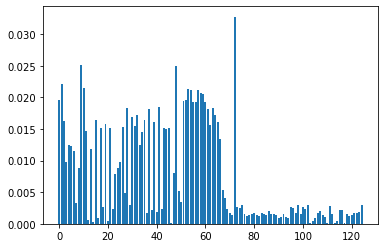

[17:22:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:22:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:22:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:22:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

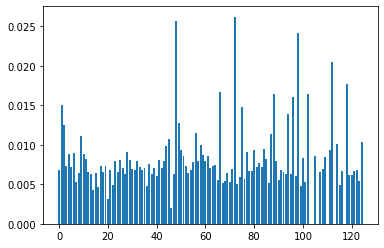

SyntaxError: 'return' outside function (Temp/ipykernel_6368/2484628235.py, line 67)

In [79]:
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn import model_selection
from sklearn.utils import class_weight
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.gaussian_process.kernels import RBF
import numpy as np
import pandas as pd

X = df2.drop('churn', axis=1)
y = df2['churn']

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

def run_exps(X_train: pd.DataFrame , y_train: pd.DataFrame, X_test: pd.DataFrame, y_test: pd.DataFrame) -> pd.DataFrame:
    '''
    Lightweight script to test many models and find winners
:param X_train: training split
    :param y_train: training target vector
    :param X_test: test split
    :param y_test: test target vector
    :return: DataFrame of predictions
    '''
kernel = 1.0 * RBF(1.0)
dfs = []
models = [
       
      ('RF', RandomForestClassifier()), 
      ('XGB', XGBClassifier())]
results = []
names = []
scoring = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted', 'roc_auc']
target_names = ['0', '1']
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, shuffle=True)
    cv_results = model_selection.cross_validate(model, X_train, y_train, cv=kfold, scoring=scoring)
    clf = model.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(name)
    print(classification_report(y_test, y_pred, target_names=target_names))
    results.append(cv_results)
    names.append(name)
    importance = model.feature_importances_
# summarize feature importance
    for i,v in enumerate(importance):
        print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
    plt.bar([x for x in range(len(importance))], importance)
    plt.show()

    this_df = pd.DataFrame(cv_results)
    this_df['model'] = name
    dfs.append(this_df)


    final = pd.concat(dfs, ignore_index=True)

return final

In [80]:
final

,fit_time,score_time,test_accuracy,test_precision_weighted,test_recall_weighted,test_f1_weighted,test_roc_auc,model
0,21.565240,0.302812,0.606976,0.607046,0.606976,0.606951,0.654436,RF
1,21.613960,0.304211,0.608884,0.608863,0.608884,0.608857,0.657017,RF
2,21.258043,0.296806,0.604373,0.604392,0.604373,0.604375,0.650064,RF
3,21.302961,0.310849,0.618948,0.619383,0.618948,0.618924,0.666101,RF
4,21.195347,0.291730,0.615131,0.615140,0.615131,0.615135,0.668296,RF
5,21.085043,0.296833,0.620510,0.620528,0.620510,0.620488,0.669329,RF
6,21.136396,0.316602,0.614090,0.613995,0.614090,0.614000,0.657647,RF
7,21.556574,0.307006,0.618948,0.619174,0.618948,0.618793,0.667835,RF
8,21.281731,0.312029,0.609511,0.609417,0.609511,0.609389,0.659985,RF
9,21.430532,0.303876,0.613676,0.613718,0.613676,0.613573,0.659800,RF


In [81]:
bootstraps = []
for model in list(set(final.model.values)):
    model_df = final.loc[final.model == model]
    bootstrap = model_df.sample(n=3000, replace=True)
    bootstraps.append(bootstrap)
        
bootstrap_df = pd.concat(bootstraps, ignore_index=True)
results_long = pd.melt(bootstrap_df,id_vars=['model'],var_name='metrics', value_name='values')
time_metrics = ['fit_time','score_time'] # fit time metrics
## PERFORMANCE METRICS
results_long_nofit = results_long.loc[~results_long['metrics'].isin(time_metrics)] # get df without fit data
results_long_nofit = results_long_nofit.sort_values(by='values')
## TIME METRICS
results_long_fit = results_long.loc[results_long['metrics'].isin(time_metrics)] # df with fit data
results_long_fit = results_long_fit.sort_values(by='values')

Text(0.5, 1.0, 'Comparison of Model by Classification Metric')

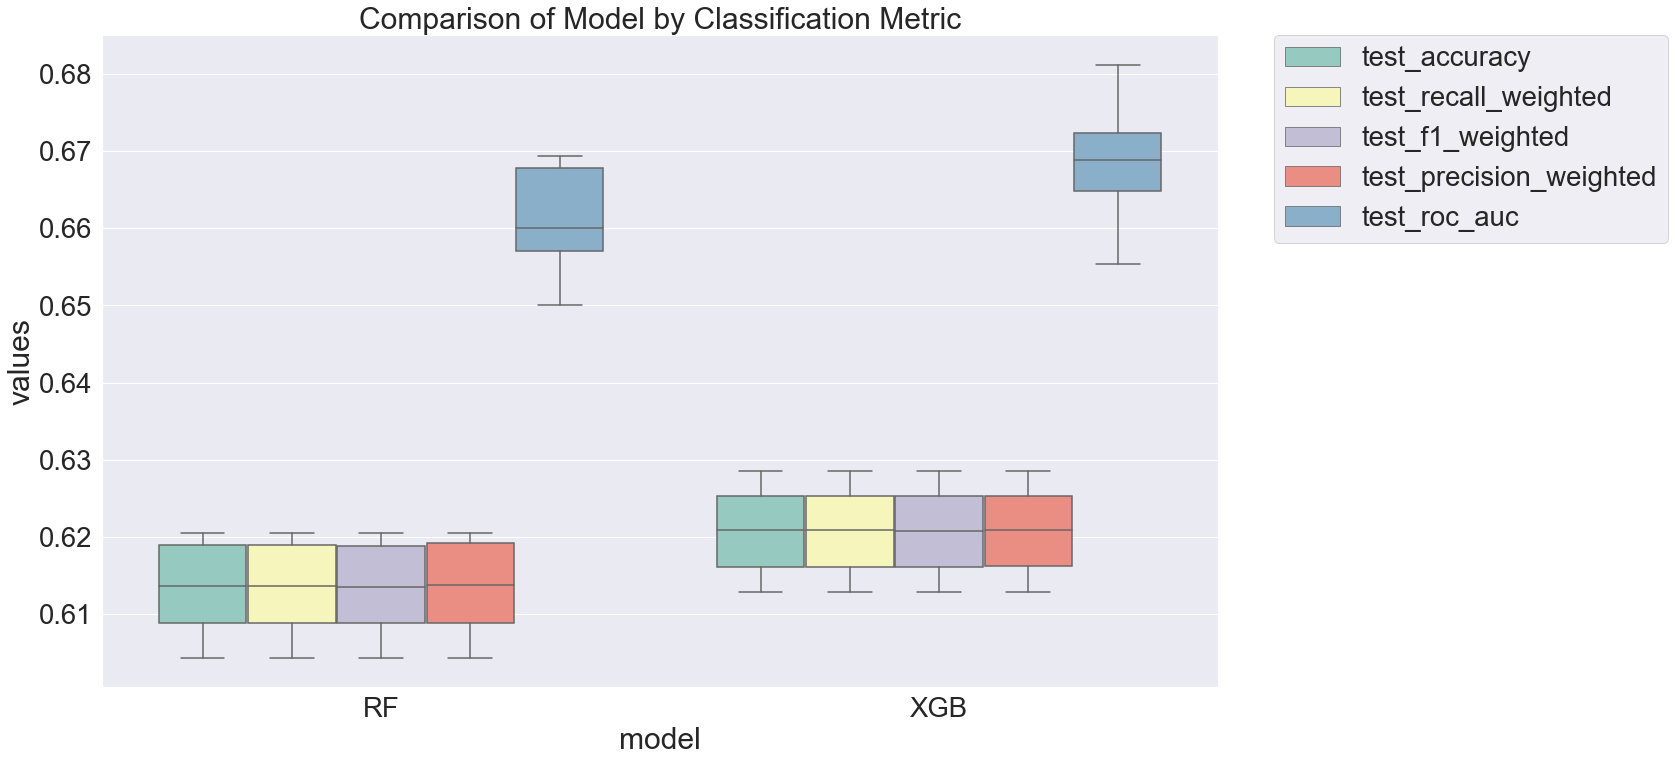

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20, 12))
sns.set(font_scale=2.5)
g = sns.boxplot(x="model", y="values", hue="metrics", data=results_long_nofit, palette="Set3")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Comparison of Model by Classification Metric')
#plt.savefig('./benchmark_models_performance_df3.png',dpi=300)

In [83]:
metrics = list(set(results_long_nofit.metrics.values))
bootstrap_df.groupby(['model'])[metrics].agg([np.std, np.mean])

test_recall_weighted           test_accuracy            \
                       std      mean           std      mean   
model                                                          
RF                0.005205  0.613062      0.005205  0.613062   
XGB               0.005209  0.620868      0.005209  0.620868   

      test_precision_weighted           test_f1_weighted            \
                          std      mean              std      mean   
model                                                                
RF                   0.005276  0.613119         0.005193  0.613007   
XGB                  0.005278  0.620958         0.005210  0.620867   

      test_roc_auc            
               std      mean  
model                         
RF        0.006244  0.661083  
XGB       0.007506  0.668144

<a id = "18"></a><br>
## Trial and Conclusion

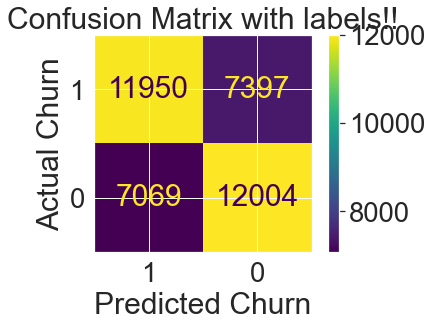

In [84]:
cm = confusion_matrix(y_test, y_pred)
cmd_obj = ConfusionMatrixDisplay(cm, display_labels=['1', '0'])
cmd_obj.plot()
cmd_obj.ax_.set(
                    title='Confusion Matrix with labels!!', 
                    xlabel='Predicted Churn', 
                    ylabel='Actual Churn'
                    )
plt.show()

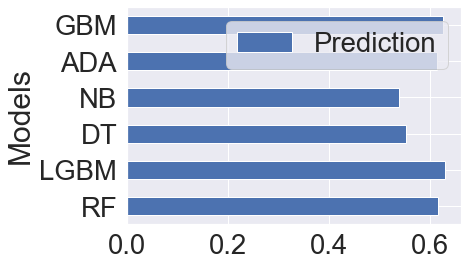

In [85]:
df = pd.DataFrame({'Models':['RF','LGBM','DT', 'NB','ADA','GBM'], 'Prediction':[0.616, 0.631, 0.552, 0.539 ,0.614, 0.626]})
ax = df.plot.barh(x='Models', y='Prediction', rot=0)

<a id = "19"></a><br>
# Hyperparameter Tuning -- Grid Search -- Cross Validation
We will compare 2 ML classifier and evaluate mean accuracy of each of them by stratified cross validation.
* Random Forest
* Light GBM

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

h = 0.02  # step size in the mesh

X = df3.drop('churn', axis=1)
y = df3['churn']

names = [
    "Nearest Neighbors",
    "Linear SVM",
    "RBF SVM",
    "Gaussian Process",
    "Decision Tree",
    "Random Forest",
    "Neural Net",
    "AdaBoost",
    "Naive Bayes",
    "QDA",
]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
]




datasets = [df,df2
    #make_moons(noise=0.3, random_state=0),
    #make_circles(noise=0.2, factor=0.5, random_state=1),
    
]




figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    
    X = StandardScaler().fit_transform(X)
   
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.4, random_state=42
    )
    
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(["#FF0000", "#0000FF"])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
   
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k")
    # Plot the testing points
    ax.scatter(
        X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors="k"
    )
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)
       
        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
            continue
        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=0.8)

        # Plot the training points
        ax.scatter(
            X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k"
        )
        # Plot the testing points
        ax.scatter(
            X_test[:, 0],
            X_test[:, 1],
            c=y_test,
            cmap=cm_bright,
            edgecolors="k",
            alpha=0.6,
        )

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(
            xx.max() - 0.3,
            yy.min() + 0.3,
            ("%.2f" % score).lstrip("0"),
            size=15,
            horizontalalignment="right",
        )
        i += 1
        
        
        
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)

    fig, ax = plt.subplots()
    for i, (train, test) in enumerate(cv.split(X, y)):
        classifier.fit(X_train, y_train)
        viz = RocCurveDisplay.from_estimator(
            classifier,
            X_test,
            y_test,
            name="ROC fold {}".format(i),
            alpha=0.3,
            lw=1,
            ax=ax,
        )
        interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
        interp_tpr[0] = 0.0
        tprs.append(interp_tpr)
        aucs.append(viz.roc_auc)

    ax.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax.plot(
        mean_fpr,
        mean_tpr,
        color="b",
        label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
        lw=2,
        alpha=0.8,
    )

    std_tpr = np.std(tprs, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    ax.fill_between(
        mean_fpr,
        tprs_lower,
        tprs_upper,
        color="grey",
        alpha=0.2,
        label=r"$\pm$ 1 std. dev.",
    )

    ax.set(
        xlim=[-0.05, 1.05],
        ylim=[-0.05, 1.05],
        title="Receiving operating characteristic example",
    )
    ax.legend(loc="lower right")
    plt.show()        
        
plt.tight_layout()
plt.show()

In [86]:
X = df2.drop('churn', axis=1)
y = df2['churn']

#df4 = df3.filter(['drop_vce_Mean','models','threeway_Mean','eqpdays','change_rev','months','avg3qty','opk_vce_Mean','churn', 'unan_vce_Mean','mou_cvce_Mean',	'cc_mou_Mean','recv_vce_Mean'	,'ccrndmou_Mean','mou_Mean','ovrmou_Mean'])
#X = df4.drop('churn', axis=1)
#y = df4['churn']

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=999)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=1/3, random_state=999)

print(X_train.shape)
print(X_val.shape)
print(X_test.shape)
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(51225, 125)
(25613, 125)
(19210, 125)
(51225,)
(25613,)
(19210,)


In [88]:
from sklearn.preprocessing import StandardScaler, Normalizer


sc = StandardScaler()


X_train = sc.fit_transform(X_train)
X_val = sc.transform(X_val)
X_test = sc.transform(X_test)



In [89]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

import tensorflow as tf
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, r2_score

In [90]:
from tensorflow import keras
from tensorflow.keras import layers
metrics = [
    keras.metrics.FalseNegatives(name="fn"),
    keras.metrics.FalsePositives(name="fp"),
    keras.metrics.TrueNegatives(name="tn"),
    keras.metrics.TruePositives(name="tp"),
    keras.metrics.Precision(name="precision"),
    keras.metrics.Recall(name="recall"),
    keras.metrics.BinaryAccuracy(name="accuracy")
]

optimizer =tf.keras.optimizers.Adam(
    learning_rate=0.0001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-06,
    amsgrad=True,
    name="Adam")


loss = tf.keras.losses.BinaryCrossentropy()


In [91]:
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.01))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.001))
model.add(Dense(32, activation = 'relu'))

model.add(Dense(1, activation='sigmoid')) 
optimizer = optimizer
model.compile(loss=loss, optimizer=optimizer, metrics=metrics)

callback = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience = 150)
history=model.fit(X_train, y_train, epochs=150, batch_size=1000, callbacks=[callback], verbose=1)

model.summary()

Epoch 1/150
52/52 [==============================] - 0s 4ms/step - loss: 0.7240 - fn: 2725.0000 - fp: 22828.0000 - tn: 3124.0000 - tp: 22548.0000 - precision: 0.4969 - recall: 0.8922 - accuracy: 0.5012
Epoch 2/150
52/52 [==============================] - 0s 3ms/step - loss: 0.6917 - fn: 10594.0000 - fp: 13457.0000 - tn: 12495.0000 - tp: 14679.0000 - precision: 0.5217 - recall: 0.5808 - accuracy: 0.5305
Epoch 3/150
52/52 [==============================] - 0s 3ms/step - loss: 0.6861 - fn: 11746.0000 - fp: 11295.0000 - tn: 14657.0000 - tp: 13527.0000 - precision: 0.5450 - recall: 0.5352 - accuracy: 0.5502
Epoch 4/150
52/52 [==============================] - 0s 3ms/step - loss: 0.6814 - fn: 11978.0000 - fp: 10250.0000 - tn: 15702.0000 - tp: 13295.0000 - precision: 0.5647 - recall: 0.5261 - accuracy: 0.5661
Epoch 5/150
52/52 [==============================] - 0s 3ms/step - loss: 0.6774 - fn: 11563.0000 - fp: 10165.0000 - tn: 15787.0000 - tp: 13710.0000 - precision: 0.5742 - recall: 0.5425 -

In [92]:
from sklearn.metrics import accuracy_score, r2_score,f1_score

# The minimium value for the labels is 1 and corresponds to the letter 'A'.
# Since the minimum value for the label predictions is  0 we should add 1 to our predictions.
y_pred_train = model.predict_classes(X_train, verbose=0) 

# Testing the model on our training data. The error rate is 3.5%
print("Error rate of the classifier:", 1-accuracy_score(y_train, y_pred_train))
print("f1-score", f1_score(y_train, y_pred_train,average='micro'))


#testing the model on the validation data
y_pred_val = model.predict_classes(X_val, verbose=0) 
print("Error rate of the classifier:", 1-accuracy_score(y_val, y_pred_val))
print("f1-score", f1_score(y_train, y_pred_train,average='micro'))

print(y_train[0:20].ravel())
print(y_pred_train[0:20].ravel())

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
Error rate of the classifier: 0.2769155685700342
f1-score 0.7230844314299658
Error rate of the classifier: 0.41455510873384604
f1-score 0.7230844314299658
[0 0 0 1 0 0 1 0 0 0 1 1 1 0 0 0 1 0 1 0]
[0 0 1 1 0 0 1 0 1 0 1 1 1 0 0 0 0 0 1 0]


Text(0.5, 0, 'epochs')

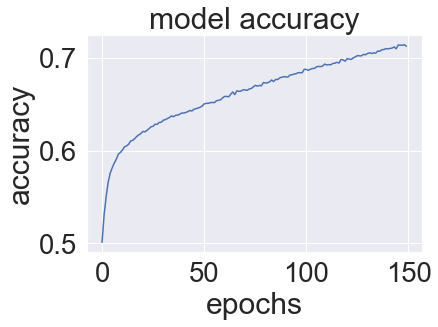

In [93]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')


In [94]:


settings_nn = []
lr = [ 10 ** x for x in range(-5,1)]
activation = ['relu', 'tanh','sigmoid']


for i in lr:
    for j in activation:
        

        model = Sequential()
        model.add(Dense(128, input_dim=X_train.shape[1], activation=j))
        model.add(Dropout(0.01))
        model.add(Dense(64, activation=j))
        model.add(Dropout(0.001))
        model.add(Dense(32, activation = j))
        model.add(Dropout(0.001))
        model.add(Dense(16, activation = j))
        model.add(Dropout(0.001))
        model.add(Dense(1, activation='sigmoid')) 
        optimizer = optimizer
        model.compile(loss=loss, optimizer=optimizer, metrics=metrics)

        callback = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience = 5)
        history=model.fit(X_train, y_train, epochs=100, batch_size=500, callbacks=[callback], verbose=1)
        y_pred_val = model.predict_classes(X_val, verbose=0) + 1
        error_rate = 1-accuracy_score(y_val, y_pred_val)
        settings_nn.append(("FNN", i, j, error_rate))
settings_nn

Epoch 1/100
103/103 [==============================] - 0s 3ms/step - loss: 0.6866 - fn: 19644.0000 - fp: 17766.0000 - tn: 34138.0000 - tp: 30902.0000 - precision: 0.6350 - recall: 0.6114 - accuracy: 0.6348
Epoch 2/100
103/103 [==============================] - 0s 3ms/step - loss: 0.6705 - fn: 11331.0000 - fp: 9738.0000 - tn: 16214.0000 - tp: 13942.0000 - precision: 0.5888 - recall: 0.5517 - accuracy: 0.5887
Epoch 3/100
103/103 [==============================] - 0s 3ms/step - loss: 0.6637 - fn: 11050.0000 - fp: 9472.0000 - tn: 16480.0000 - tp: 14223.0000 - precision: 0.6003 - recall: 0.5628 - accuracy: 0.5994
Epoch 4/100
103/103 [==============================] - 0s 3ms/step - loss: 0.6589 - fn: 10749.0000 - fp: 9450.0000 - tn: 16502.0000 - tp: 14524.0000 - precision: 0.6058 - recall: 0.5747 - accuracy: 0.6057
Epoch 5/100
103/103 [==============================] - 0s 3ms/step - loss: 0.6552 - fn: 10428.0000 - fp: 9465.0000 - tn: 16487.0000 - tp: 14845.0000 - precision: 0.6107 - recall: 

[('FNN', 1e-05, 'relu', 0.7840940147581307),
 ('FNN', 1e-05, 'tanh', 0.7929176590012884),
 ('FNN', 1e-05, 'sigmoid', 0.7552805216101198),
 ('FNN', 0.0001, 'relu', 0.7792136805528442),
 ('FNN', 0.0001, 'tanh', 0.786827001913091),
 ('FNN', 0.0001, 'sigmoid', 0.8038105649474876),
 ('FNN', 0.001, 'relu', 0.7960410728926717),
 ('FNN', 0.001, 'tanh', 0.7835864600007809),
 ('FNN', 0.001, 'sigmoid', 0.8050989731776832),
 ('FNN', 0.01, 'relu', 0.7780814430172178),
 ('FNN', 0.01, 'tanh', 0.7940108538632725),
 ('FNN', 0.01, 'sigmoid', 0.7893647756998399),
 ('FNN', 0.1, 'relu', 0.791121696013743),
 ('FNN', 0.1, 'tanh', 0.7935423417795651),
 ('FNN', 0.1, 'sigmoid', 0.7845234841681958),
 ('FNN', 1, 'relu', 0.7913559520555968),
 ('FNN', 1, 'tanh', 0.7871393433022293),
 ('FNN', 1, 'sigmoid', 0.8066216374497326)]

In [95]:
# extracting the best model setting.
best_setting = max(settings_nn, key=lambda x: x[-1])
best_lr = best_setting[1]
best_activation = best_setting[2]
best_setting

('FNN', 1, 'sigmoid', 0.8066216374497326)

In [96]:
# concatenating the X_train and X_val to train our best model on the data. 
X_concatenated = np.concatenate((X_train, X_val))
print(X_concatenated.shape)
print(X_concatenated.dtype)
y_concatenated = np.concatenate((y_train, y_val))
print(y_concatenated.shape)
y_concatenated = np.concatenate((y_train, y_val))
print(y_concatenated.shape)

(76838, 125)
float64
(76838,)
(76838,)


In [97]:
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation=best_activation))
model.add(Dropout(0.01))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.001))
model.add(Dense(32, activation = 'relu'))
model.add(Dropout(0.001))
model.add(Dense(16, activation = 'relu'))
model.add(Dropout(0.001))
model.add(Dense(8, activation = 'relu'))
model.add(Dropout(0.0001))
model.add(Dense(1, activation='sigmoid')) 
optimizer = Adam(learning_rate = 0.001 )
model.compile(loss=loss, optimizer=optimizer, metrics=metrics)

callback = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience = 150)
history=model.fit(X_train, y_train, epochs=100, batch_size=1000, callbacks=[callback], verbose=1)




Epoch 1/100
52/52 [==============================] - 0s 5ms/step - loss: 0.6816 - fn: 22390.0000 - fp: 20198.0000 - tn: 31706.0000 - tp: 28156.0000 - precision: 0.5823 - recall: 0.5570 - accuracy: 0.5843
Epoch 2/100
52/52 [==============================] - 0s 4ms/step - loss: 0.6672 - fn: 10677.0000 - fp: 10174.0000 - tn: 15778.0000 - tp: 14596.0000 - precision: 0.5893 - recall: 0.5775 - accuracy: 0.5930
Epoch 3/100
52/52 [==============================] - 0s 4ms/step - loss: 0.6631 - fn: 10213.0000 - fp: 10293.0000 - tn: 15659.0000 - tp: 15060.0000 - precision: 0.5940 - recall: 0.5959 - accuracy: 0.5997
Epoch 4/100
52/52 [==============================] - 0s 4ms/step - loss: 0.6604 - fn: 10161.0000 - fp: 10198.0000 - tn: 15754.0000 - tp: 15112.0000 - precision: 0.5971 - recall: 0.5980 - accuracy: 0.6026
Epoch 5/100
52/52 [==============================] - 0s 4ms/step - loss: 0.6571 - fn: 9931.0000 - fp: 10127.0000 - tn: 15825.0000 - tp: 15342.0000 - precision: 0.6024 - recall: 0.6071 

Text(0.5, 0, 'epochs')

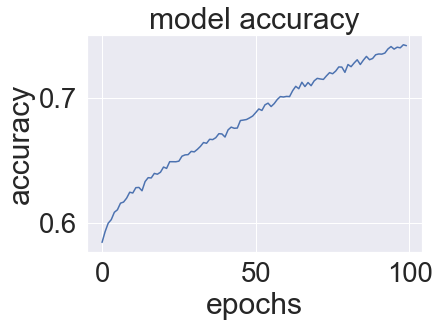

In [98]:

import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')

In [99]:
# predicting the labels of the concatenated data with the best model settings.
y_pred_con = model.predict_classes(X_val, verbose=0)
error_rate = 1-accuracy_score(y_pred_con, y_val)
print("concatenated data error", error_rate)

# predicting the labels of the test data with the best model settings.
y_pred_test = model.predict_classes(X_test, verbose=0)
error_rate = 1-accuracy_score(y_pred_test, y_test)
print("test error", error_rate)

print(y_pred_test[0:20].ravel())
print(y_test[0:20].ravel())




concatenated data error 0.41580447429039946
test error 0.41077563768870384
[1 0 0 1 0 1 0 0 1 0 0 0 1 0 1 0 1 1 0 1]
[1 1 0 0 0 1 0 0 1 0 0 0 0 0 1 1 0 0 0 1]


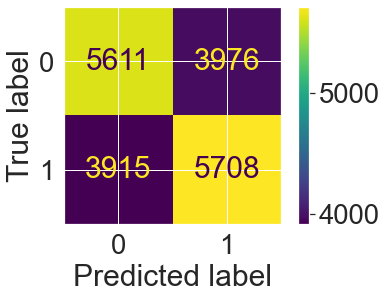

In [100]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_pred_test, y_test)

cm = confusion_matrix(y_test, y_pred_test, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_)
disp.plot()

plt.show()

import numpy as np
import torch
from torch.nn import Sequential
from torch import nn
from torch import optim
from random import shuffle

device = torch.device('cpu')
print("Device: {}".format(device))

In [101]:
X = df2.drop('churn', axis=1)
y = df2['churn']

X_train = sc.fit_transform(X_train)
X_val = sc.transform(X_val)
X_test = sc.transform(X_test)

def get_device():
    if torch.cuda.is_available():
        device = torch.device('cuda:0')
    else:
        device = torch.device("cpu")
    return device

def df_to_tensor(df3):
    device = get_device()
    return torch.from_numpy(df3.values).float().to(device)

df_tensor = df_to_tensor(df3)
series_tensor = df_to_tensor(y)

NameError: name 'df3' is not defined

In [ ]:
X = df_tensor
y = series_tensor



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=999)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=999)



In [ ]:





print(X_train.shape[0], 'train samples')
print(X_val.shape[0], 'validation samples')

In [ ]:
in_size = X_train.shape[1]

# Move data to the device being used (CPU or GPU), and transform all data to Float32
x_train = X_train.to(device).to(torch.float32)
y_train = y_train.to(device).to(torch.float32)
x_valid = X_val.to(device).to(torch.float32)
y_valid = y_val.to(device).to(torch.float32)
x_test = X_test.to(device).to(torch.float32)
y_test = y_test.to(device).to(torch.float32)

def build_model():
    
    model = Sequential()
    
    model.add_module('Linear_1', nn.Linear(in_features=in_size, out_features=in_size, bias=True))
    model.add_module('Relu_1', nn.ReLU())
    model.add_module('Linear_2', nn.Linear(in_features=in_size, out_features=in_size, bias=True))
    model.add_module('Relu_2', nn.ReLU())
    model.add_module('Linear_3', nn.Linear(in_features=in_size, out_features=1, bias=True))
    model.add_module('Out_activation', nn.Sigmoid())
    
    return model

# CREATE A TRAIN FUNCTION
def train_model(model, x_train_, y_train_, x_valid_, y_valid_, batch_size, num_epochs):
    print("Training...")
    # Crete optimizer (SGD with learning rate = 0.001)
    optimizer = optim.SGD(model.parameters(), lr=0.001)
    # Create the loss function
    binary_cross_entropy_loss = nn.BCELoss(reduction='mean')
    # Train the model
    model.train()

    acc_history = []
    val_acc_history = []
    
    batch_indices = list(range(len(x_train_)//batch_size))
    shuffle(batch_indices)
    
    for epoch in range(num_epochs):
        model.train()
        running_train_acc = 0 
        for b_idx in batch_indices:
            optimizer.zero_grad()
            
            # Create batch
            batch_start = b_idx * batch_size
            batch_end = (b_idx + 1) * batch_size
            data_batch = x_train_[batch_start : batch_end]
            y_batch = y_train_[batch_start : batch_end]
            
            # Forward pass
            predictions = model(data_batch).squeeze()
            
            # Calculate loss
            loss = binary_cross_entropy_loss(predictions, y_batch)

            # Backward pass and update
            loss.backward()
            optimizer.step()

            # Calculate perfrmance metic (accuracy)
            accuracy = ((predictions > 0.5) == y_batch).sum().item() / len(y)
            running_train_acc += accuracy

        train_acc = running_train_acc / len(batch_indices)

        model.eval()
        predictions = model(x_valid_).squeeze()
        val_acc = ((predictions > 0.5) == y_valid_).sum().item() / len(y_valid_)

        acc_history.append(train_acc)
        val_acc_history.append(val_acc)

    print('Training done.')
    predictions = model(x_valid_).squeeze()
    accuracy = ((predictions > 0.5) == y_valid_).sum().item() / len(y_valid_)

    print("Accuracy on test set: {}".format(accuracy))
    
    return acc_history, val_acc_history

model = build_model().to(device)
acc_history, val_acc_history = train_model(model, x_train, y_train, x_valid, y_valid, batch_size=50, num_epochs = 1000)

In [ ]:
def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points


In [ ]:
plt.plot(range(1, len(acc_history) + 1), acc_history)
plt.plot(range(1, len(val_acc_history) + 1), val_acc_history)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['training', 'validation'])
plt.show()

smooth_acc_history = smooth_curve(acc_history)
val_smooth_acc_history = smooth_curve(val_acc_history)

plt.plot(range(1, len(smooth_acc_history) + 1), smooth_acc_history)
plt.plot(range(1, len(val_smooth_acc_history) + 1), val_smooth_acc_history)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['training', 'validation'])
plt.show()

In [ ]:
# Training the final model and the whole training set
# Computing mean and standard deviation of the whole training data
model = build_model().to(device)

x_train_whole = x_train_whole.to(device).to(torch.float32)
y_train_whole = y_train_whole.to(device).to(torch.float32)
acc_history, val_acc_history = train_model(model, x_train_whole, y_train_whole, 
                                                   x_test, y_test, batch_size=32, num_epochs = 125)

In [102]:
df_test = pd.read_csv(r'C:\Users\yoram\Desktop\Untitled folder\small_churn_data_set.csv', delimiter= ',' )

In [103]:
df_test= df_test.replace(to_replace={"yes":1, "no":0})
encoding_col=[]
for i in df_test.select_dtypes(include='object'):   
    print(i,'-->',df_test[i].nunique())
    encoding_col.append(i)

state --> 51
area_code --> 3


In [104]:
df_test = pd.get_dummies(df_test, drop_first=True, columns = encoding_col, prefix = encoding_col)

In [105]:
df_test.shape
#df_test.columns


(5000, 70)

In [106]:
X = df_test.drop('churn', axis=1)
y = df_test['churn']


In [107]:
df_tensor = df_to_tensor(df_test)
series_tensor = df_to_tensor(y)


NameError: name 'df_to_tensor' is not defined

In [ ]:
X = df_tensor
y = series_tensor

In [109]:

X_train_test, X_test_test, y_train_test, y_test_test = train_test_split(X, y, test_size=0.5, random_state=42)
print("X_train_test",len(X_train_test))
print("X_test_test",len(X_test_test))
print("y_train_test",len(y_train_test))
print("y_test_test",len(y_test_test))

X_train = sc.fit_transform(X_train)
X_val = sc.transform(X_val)
X_test = sc.transform(X_test)






X_train_test 2500
X_test_test 2500
y_train_test 2500
y_test_test 2500


In [ ]:
def get_device():
    if torch.cuda.is_available():
        device = torch.device('cuda:0')
    else:
        device = torch.device("cpu")
    return device

def df_to_tensor(df_test):
    device = get_device()
    return torch.from_numpy(df_test.values).float().to(device)

In [ ]:
X = df_tensor
y = series_tensor


In [110]:
X_train_test.shape, X_test_test.shape, y_train_test.shape, y_test_test.shape



((2500, 69), (2500, 69), (2500,), (2500,))

sc = StandardScaler()
X_train_test = sc.fit_transform(X_train_test)
X_test_test = sc.transform(X_test_test)

In [ ]:
in_size = x_train.shape[1]

# Move data to the device being used (CPU or GPU), and transform all data to Float32
x_train = X_train_test.to(device).to(torch.float32)
y_train = y_train_test.to(device).to(torch.float32)
x_valid = X_val.to(device).to(torch.float32)
y_valid = y_val.to(device).to(torch.float32)
x_test = X_test_test.to(device).to(torch.float32)
y_test = y_test_test.to(device).to(torch.float32)

def build_model():
    
    model = Sequential()
    
    model.add_module('Linear_1', nn.Linear(in_features=in_size, out_features=in_size, bias=True))
    model.add_module('Relu_1', nn.ReLU())
    model.add_module('Linear_2', nn.Linear(in_features=in_size, out_features=in_size, bias=True))
    model.add_module('Relu_2', nn.ReLU())
    model.add_module('Linear_3', nn.Linear(in_features=in_size, out_features=1, bias=True))
    model.add_module('Out_activation', nn.Sigmoid())
    
    return model

# CREATE A TRAIN FUNCTION
def train_model(model, x_train_, y_train_, x_valid_, y_valid_, batch_size, num_epochs):
    print("Training...")
    # Crete optimizer (SGD with learning rate = 0.001)
    optimizer = optim.SGD(model.parameters(), lr=0.001)
    # Create the loss function
    binary_cross_entropy_loss = nn.BCELoss(reduction='mean')
    # Train the model
    model.train()

    acc_history = []
    val_acc_history = []
    
    batch_indices = list(range(len(x_train_)//batch_size))
    shuffle(batch_indices)
    
    for epoch in range(num_epochs):
        model.train()
        running_train_acc = 0 
        for b_idx in batch_indices:
            optimizer.zero_grad()
            
            # Create batch
            batch_start = b_idx * batch_size
            batch_end = (b_idx + 1) * batch_size
            data_batch = x_train_[batch_start : batch_end]
            y_batch = y_train_[batch_start : batch_end]
            
            # Forward pass
            predictions = model(data_batch).squeeze()
            
            # Calculate loss
            loss = binary_cross_entropy_loss(predictions, y_batch)

            # Backward pass and update
            loss.backward()
            optimizer.step()

            # Calculate perfrmance metic (accuracy)
            accuracy = ((predictions > 0.5) == y_batch).sum().item() / len(y)
            running_train_acc += accuracy

        train_acc = running_train_acc / len(batch_indices)

        model.eval()
        predictions = model(x_valid_).squeeze()
        val_acc = ((predictions > 0.5) == y_valid_).sum().item() / len(y_valid_)

        acc_history.append(train_acc)
        val_acc_history.append(val_acc)

    print('Training done.')
    predictions = model(x_valid_).squeeze()
    accuracy = ((predictions > 0.5) == y_valid_).sum().item() / len(y_valid_)

    print("Accuracy on test set: {}".format(accuracy))
    
    return acc_history, val_acc_history

model = build_model().to(device)
acc_history, val_acc_history = train_model(model, x_train, y_train, x_valid, y_valid, batch_size=50, num_epochs = 150)

In [ ]:
model = Sequential()
model.add(Dense(128, input_dim=X_train_test.shape[1], activation='relu'))
model.add(Dropout(0.01))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.001))
model.add(Dense(32, activation = 'relu'))
model.add(Dropout(0.001))
model.add(Dense(16, activation = 'relu'))
model.add(Dropout(0.001))
model.add(Dense(8, activation = 'relu'))
model.add(Dropout(0.0001))
model.add(Dense(1, activation='sigmoid')) 
optimizer = optimizer
model.compile(loss=loss, optimizer=optimizer, metrics=metrics)

callback = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience = 150)
history=model.fit(X_train_test, y_train_test, epochs=150, batch_size=1000, callbacks=[callback], verbose=1)

In [ ]:
from sklearn.metrics import accuracy_score, r2_score,f1_score

# The minimium value for the labels is 1 and corresponds to the letter 'A'.
# Since the minimum value for the label predictions is  0 we should add 1 to our predictions.
y_pred_train_testt = model.predict_classes(X_train_test, verbose=0) 

# Testing the model on our training data. The error rate is 3.5%
print("Error rate of the classifier:", 1-accuracy_score(y_train, y_pred_train))
print("f1-score", f1_score(y_train_test, y_pred_train_testt,average='micro'))


#testing the model on the validation data
y_pred_val_testt = model.predict_classes(X_test_test, verbose=0) 
print("Error rate of the classifier:", 1-accuracy_score(y_test_test, y_pred_val_testt))
print("f1-score", f1_score(y_train_test, y_pred_val_testt,average='micro'))

print(y_train[0:20].ravel())
print(y_pred_train[0:20].ravel())

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_pred_val_testt, y_test_test)

cm = confusion_matrix(y_test_test, y_pred_val_testt, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_)
disp.plot()

plt.show()

In [111]:
import numpy
X_test_test = numpy.lib.pad(X_test_test, ((0,0),(0,56)),'constant', constant_values=(0))
X_train_test = numpy.lib.pad(X_train_test, ((0,0),(0,56)),'constant', constant_values=(0))

sc = StandardScaler()
X_train_test = sc.fit_transform(X_train_test)
X_test_test = sc.transform(X_test_test)




In [112]:
# predicting the labels of the concatenated data with the best model settings.
y_pred_con_testset = model.predict_classes(X_train_test, verbose=0)
error_rate = 1-accuracy_score(y_pred_con_testset, y_train_test)
print("concatenated data error", error_rate)









concatenated data error 0.5808


In [113]:

# predicting the labels of the test data with the best model settings.
y_pred_test_testset = model.predict_classes(X_test_test, verbose=0)
error_rate = 1-accuracy_score(y_pred_test_testset, y_test_test)
print("test error", error_rate)

print(y_pred_test_testset[0:20].ravel())
print(y_test_test[0:20].ravel())


test error 0.5972
[0 1 1 0 0 1 1 0 0 1 0 1 1 1 1 0 0 1 1 1]
[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]


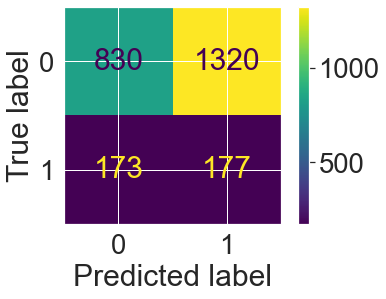

In [114]:
confusion_matrix(y_pred_test_testset, y_test_test)

cm = confusion_matrix(y_test_test, y_pred_test_testset, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_)
disp.plot()

plt.show()